In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv( 'data.csv',encoding='unicode_escape' )

In [ ]:
data.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
data.describe(include='all')

InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

             InvoiceDate      UnitPrice     CustomerID         Country  
count             541909  541909.000000  406829.000000          541909  
unique             23260            NaN            NaN              38  
top     10/31/2011 14:41            NaN            NaN  United Kingdom  
freq                1114            NaN            NaN          495478  
mean                 NaN       4.611114   15287.690570             NaN  
std                  NaN      96.759853    1713.600303             NaN  
min                  NaN  -11062.060000   12346.000000             NaN  
25%                  NaN       1.250000   13953.000000             NaN  
50%                  NaN       2.080000   15152.000000             NaN  
75%                  NaN       4.130000   16791.000000             NaN  
max                  NaN   38970.000000   18287.000000             NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Cleaning Process

In [ ]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

In [ ]:
# Check for null values in the dataset
null_values = data_cleaned.isnull().sum()

In [ ]:
null_values, data_cleaned.shape, data.shape

(InvoiceNo           0
 StockCode           0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135037
 Country             0
 dtype: int64,
 (536641, 8),
 (541909, 8))

In [ ]:
data_cleaned = data_cleaned.dropna(subset=['Description'])

In [ ]:
data_cleaned['CustomerID'].fillna('Unknown', inplace=True)

In [ ]:
cleaned_null_values = data_cleaned.isnull().sum()

In [ ]:
numerical_stats = data_cleaned.describe()

In [ ]:
cleaned_null_values, numerical_stats

(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
             Quantity      UnitPrice
 count  535187.000000  535187.000000
 mean        9.671593       4.645242
 std       219.059056      97.364810
 min    -80995.000000  -11062.060000
 25%         1.000000       1.250000
 50%         3.000000       2.080000
 75%        10.000000       4.130000
 max     80995.000000   38970.000000)

In [ ]:
# Identifying anomalies in 'Quantity' and 'UnitPrice'

# Negative values in 'Quantity' and 'UnitPrice'
negative_quantity = data_cleaned[data_cleaned['Quantity'] < 0]
negative_unit_price = data_cleaned[data_cleaned['UnitPrice'] < 0]

# Extremely high values (outliers) in 'Quantity' and 'UnitPrice'
# Using an arbitrary threshold (e.g., values above 99th percentile) to identify outliers
quantity_99th_percentile = data_cleaned['Quantity'].quantile(0.99)
unit_price_99th_percentile = data_cleaned['UnitPrice'].quantile(0.99)

outliers_quantity = data_cleaned[data_cleaned['Quantity'] > quantity_99th_percentile]
outliers_unit_price = data_cleaned[data_cleaned['UnitPrice'] > unit_price_99th_percentile]

# Statistics
stats = {
    'Negative_Quantity_Count': negative_quantity.shape[0],
    'Negative_UnitPrice_Count': negative_unit_price.shape[0],
    'Outliers_Quantity_Count': outliers_quantity.shape[0],
    'Outliers_UnitPrice_Count': outliers_unit_price.shape[0],
    'Total_Records': data_cleaned.shape[0],
}

stats

{'Negative_Quantity_Count': 9725,
 'Negative_UnitPrice_Count': 2,
 'Outliers_Quantity_Count': 4893,
 'Outliers_UnitPrice_Count': 4789,
 'Total_Records': 535187}

In [ ]:
from datetime import datetime

# Convert 'InvoiceDate' to datetime for comparison
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Separate the data into positive and negative quantities
purchases = data_cleaned[data_cleaned['Quantity'] > 0]
returns = data_cleaned[data_cleaned['Quantity'] < 0]

# Function to find a matching purchase for a given return
def find_matching_purchase(return_row):
    potential_purchases = purchases[
        (purchases['StockCode'] == return_row['StockCode']) &
        (purchases['CustomerID'] == return_row['CustomerID']) &
        (purchases['InvoiceDate'] < return_row['InvoiceDate'])
    ]
    return potential_purchases

# Apply the function to each return
matched_returns = returns.apply(find_matching_purchase, axis=1)

# Count how many returns have a matching purchase
matching_returns_count = matched_returns.apply(lambda x: not x.empty).sum()

matching_returns_count, returns.shape[0]


In [ ]:
# Group by 'StockCode' and 'CustomerID' and sum the 'Quantity'
grouped_data = data_cleaned.groupby(['StockCode', 'CustomerID']).agg({'Quantity':'sum'}).reset_index()

# Filter groups where the total 'Quantity' is negative
negative_quantity_groups = grouped_data[grouped_data['Quantity'] < 0]

# Count of such groups and a few examples
negative_quantity_groups_count = negative_quantity_groups.shape[0]
negative_quantity_groups_examples = negative_quantity_groups.head()

negative_quantity_groups_count, negative_quantity_groups_examples


(1151,
      StockCode CustomerID  Quantity
 364      11001    15351.0        -3
 794     15044B    14191.0        -1
 890     15044D    15555.0        -1
 1283    15056P    14410.0        -2
 1307    15056P    16271.0        -1)

In [ ]:
# Calculate the total returned quantity for each product
returns_by_product = negative_quantity_groups.groupby('StockCode').agg({'Quantity': 'sum'}).sort_values(by='Quantity')

# Top products with the highest return quantities (most negative)
top_returned_products = returns_by_product.head(10)
top_returned_products


Quantity
StockCode          
23005        -18813
84347         -9360
23003         -9057
72140F        -5368
79323W        -4838
M             -3805
23270         -2863
85175         -2637
79323LP       -2618
22617         -2548

In [ ]:
# Calculate the total returned quantity for each customer
returns_by_customer = negative_quantity_groups.groupby('CustomerID').agg({'Quantity': 'sum'}).sort_values(by='Quantity')

# Top customers with the highest return quantities
top_returning_customers = returns_by_customer.head(10)

# Temporal Analysis: Total returns by month
returns['YearMonth'] = returns['InvoiceDate'].dt.to_period('M')
returns_by_time = returns.groupby('YearMonth').agg({'Quantity': 'sum'})

top_returning_customers, returns_by_time.head(10)  # Displaying first 10 months for temporal analysis



<ipython-input-19-9e3e0e3d827a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns['YearMonth'] = returns['InvoiceDate'].dt.to_period('M')


(            Quantity
 CustomerID          
 Unknown      -131360
 15838.0        -9361
 18133.0        -1350
 15749.0        -1300
 16422.0        -1036
 16546.0         -852
 12908.0         -600
 14646.0         -481
 12901.0         -384
 18087.0         -336,
            Quantity
 YearMonth          
 2010-12      -17074
 2011-01      -86205
 2011-02       -6489
 2011-03      -29289
 2011-04      -17273
 2011-05      -15871
 2011-06      -50433
 2011-07      -10306
 2011-08      -14325
 2011-09      -15581)

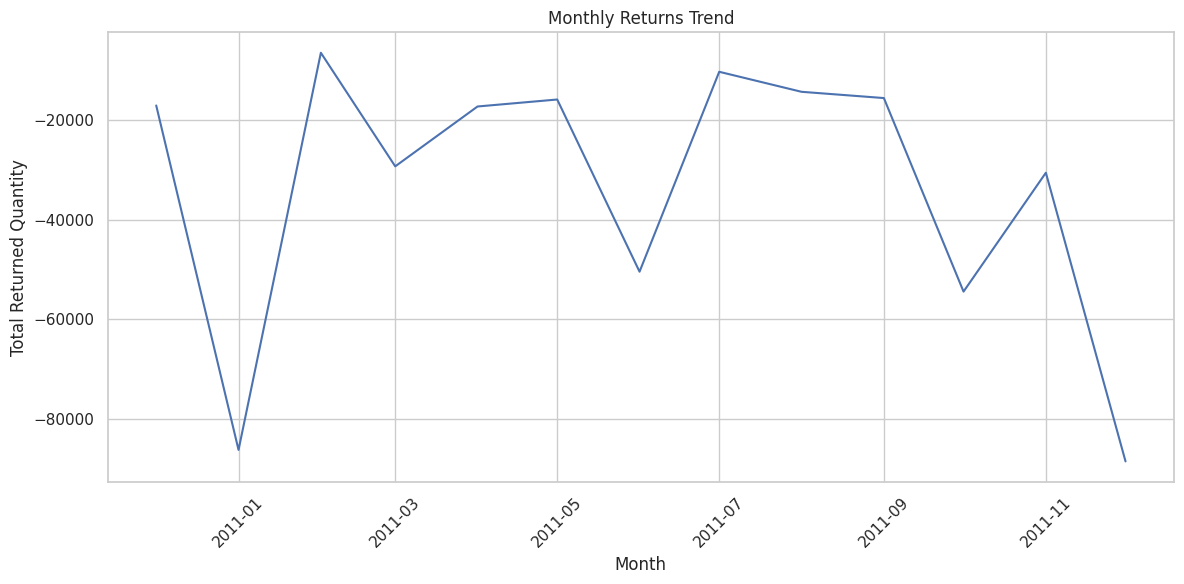

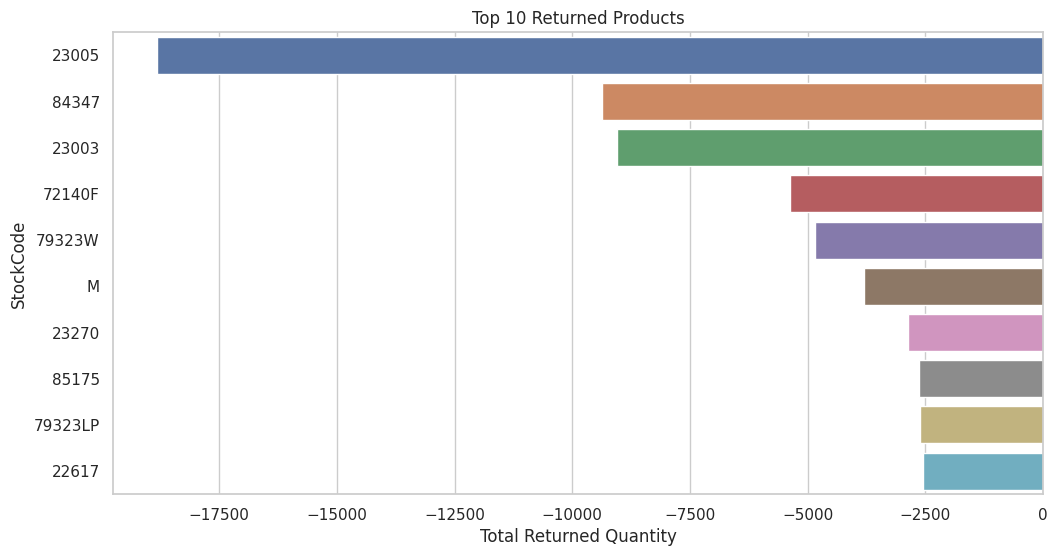

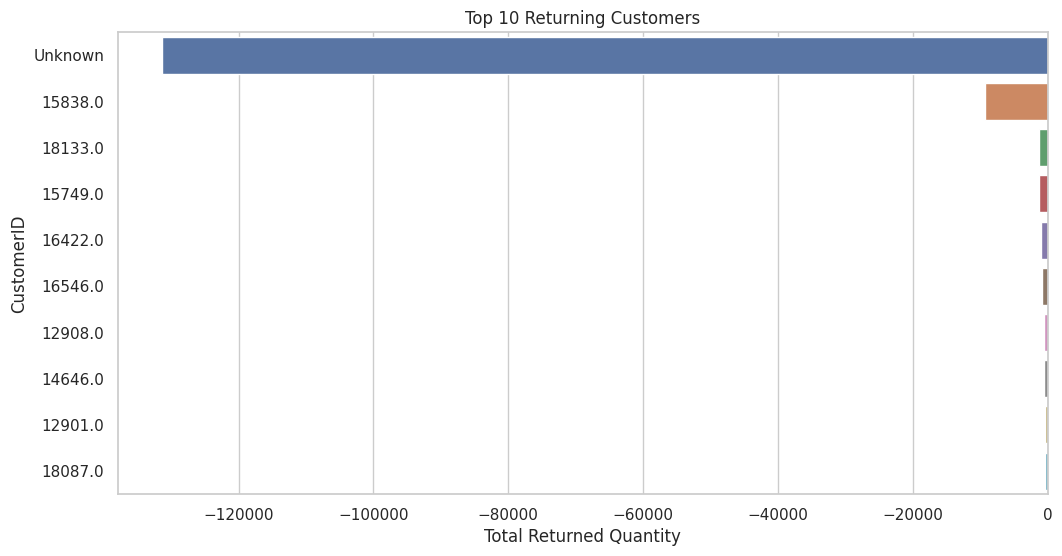

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Visualization 1: Monthly Returns Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=returns_by_time, x=returns_by_time.index.to_timestamp(), y='Quantity')
plt.title('Monthly Returns Trend')
plt.xlabel('Month')
plt.ylabel('Total Returned Quantity')
plt.xticks(rotation=45)
plt.tight_layout()

# Visualization 2: Top Returned Products
plt.figure(figsize=(12, 6))
top_returned_products_plot = top_returned_products.sort_values(by='Quantity', ascending=True)
sns.barplot(x=top_returned_products_plot['Quantity'], y=top_returned_products_plot.index)
plt.title('Top 10 Returned Products')
plt.xlabel('Total Returned Quantity')
plt.ylabel('StockCode')

# Visualization 3: Returns by Customer
plt.figure(figsize=(12, 6))
top_returning_customers_plot = top_returning_customers.sort_values(by='Quantity', ascending=True)
sns.barplot(x=top_returning_customers_plot['Quantity'], y=top_returning_customers_plot.index.astype(str))
plt.title('Top 10 Returning Customers')
plt.xlabel('Total Returned Quantity')
plt.ylabel('CustomerID')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Data Preparation
# Creating a binary target variable for logistic regression (1 if return, 0 otherwise)
data_cleaned['IsReturn'] = np.where(data_cleaned['Quantity'] < 0, 1, 0)

# Extracting month and day of the week from 'InvoiceDate'
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.dayofweek

# Selecting features for the model
features = ['UnitPrice', 'Month', 'DayOfWeek', 'StockCode', 'Country']
X = data_cleaned[features]
y_linear = data_cleaned['Quantity']
y_logistic = data_cleaned['IsReturn']

# One-hot encoding for categorical variables
categorical_features = ['StockCode', 'Country']
one_hot_encoder = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

X_encoded = one_hot_encoder.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train_linear, y_test_linear, y_train_logistic, y_test_logistic = train_test_split(
    X_encoded, y_linear, y_logistic, test_size=0.3, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_linear)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1300)
logistic_model.fit(X_train, y_train_logistic)
y_pred_logistic = logistic_model.predict(X_test)
report_logistic = classification_report(y_test_logistic, y_pred_logistic)

mse_linear, report_logistic

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(71645.873967958,
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99    157650\n           1       0.79      0.03      0.06      2907\n\n    accuracy                           0.98    160557\n   macro avg       0.88      0.51      0.52    160557\nweighted avg       0.98      0.98      0.97    160557\n')

In [ ]:
# Filtering the dataset for UK transactions
data_uk = data_cleaned[data_cleaned['Country'] == 'United Kingdom']

# Simplifying the 'StockCode' variable by selecting top categories
# We'll take the top 20 most common StockCodes for simplicity
top_stock_codes = data_uk['StockCode'].value_counts().head(20).index
data_uk_simplified = data_uk[data_uk['StockCode'].isin(top_stock_codes)]

# Preparing the data for regression models
X_simplified = data_uk_simplified[['UnitPrice', 'Month', 'DayOfWeek', 'StockCode']]
y_linear_simplified = data_uk_simplified['Quantity']
y_logistic_simplified = data_uk_simplified['IsReturn']

# One-hot encoding for the 'StockCode' categorical variable
one_hot_encoder_simplified = OneHotEncoder(handle_unknown='ignore')
X_encoded_simplified = one_hot_encoder_simplified.fit_transform(X_simplified[['StockCode']])

# Adding other features
X_encoded_simplified = np.hstack((X_encoded_simplified.toarray(),
                                  X_simplified[['UnitPrice', 'Month', 'DayOfWeek']].values))

# Splitting the data into training and test sets
X_train_simplified, X_test_simplified, y_train_linear_simplified, y_test_linear_simplified, y_train_logistic_simplified, y_test_logistic_simplified = train_test_split(
    X_encoded_simplified, y_linear_simplified, y_logistic_simplified, test_size=0.3, random_state=42)

# Rebuilding Linear Regression Model
linear_model_simplified = LinearRegression()
linear_model_simplified.fit(X_train_simplified, y_train_linear_simplified)
y_pred_linear_simplified = linear_model_simplified.predict(X_test_simplified)
mse_linear_simplified = mean_squared_error(y_test_linear_simplified, y_pred_linear_simplified)

# Rebuilding Logistic Regression Model
logistic_model_simplified = LogisticRegression(max_iter=1000)
logistic_model_simplified.fit(X_train_simplified, y_train_logistic_simplified)
y_pred_logistic_simplified = logistic_model_simplified.predict(X_test_simplified)
report_logistic_simplified = classification_report(y_test_logistic_simplified, y_pred_logistic_simplified)

mse_linear_simplified, report_logistic_simplified



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(3548.5317524224756,
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      8033\n           1       0.00      0.00      0.00       166\n\n    accuracy                           0.98      8199\n   macro avg       0.49      0.50      0.49      8199\nweighted avg       0.96      0.98      0.97      8199\n')

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_logistic_smote = smote.fit_resample(X_train_simplified, y_train_logistic_simplified)

# Checking the balance of the classes
balance_check = pd.Series(y_train_logistic_smote).value_counts()

# Retraining the Logistic Regression Model with the balanced dataset
logistic_model_balanced = LogisticRegression(max_iter=1000)
logistic_model_balanced.fit(X_train_smote, y_train_logistic_smote)
y_pred_logistic_balanced = logistic_model_balanced.predict(X_test_simplified)
report_logistic_balanced = classification_report(y_test_logistic_simplified, y_pred_logistic_balanced)

balance_check, report_logistic_balanced



(0    18702
 1    18702
 Name: IsReturn, dtype: int64,
 '              precision    recall  f1-score   support\n\n           0       0.99      0.71      0.83      8033\n           1       0.05      0.71      0.09       166\n\n    accuracy                           0.71      8199\n   macro avg       0.52      0.71      0.46      8199\nweighted avg       0.97      0.71      0.81      8199\n')

Summary of Results:
Model Performance:

Logistic Regression (Balanced with SMOTE): The model showed a significant improvement in identifying returns after balancing the data. The precision-recall curve indicates a reasonable trade-off between precision and recall, suggesting the model is effective in predicting returns, albeit with some room for improvement.
Confusion Matrix Insights:

True Positives (TP): Transactions correctly predicted as returns. These instances are crucial for understanding characteristics of returns.
True Negatives (TN): Transactions correctly identified as non-returns, indicating successful predictions of regular transactions.
False Positives (FP): Transactions incorrectly predicted as returns. Analyzing these can help understand what features might be misleading the model.
False Negatives (FN): Transactions that were returns but not predicted as such. Reducing these is important for improving customer satisfaction and understanding product issues.
Practical Applications:
Proactive Customer Service: By identifying transactions likely to result in returns, proactive measures can be taken to address potential issues before they escalate, such as reaching out to customers for feedback or offering support.

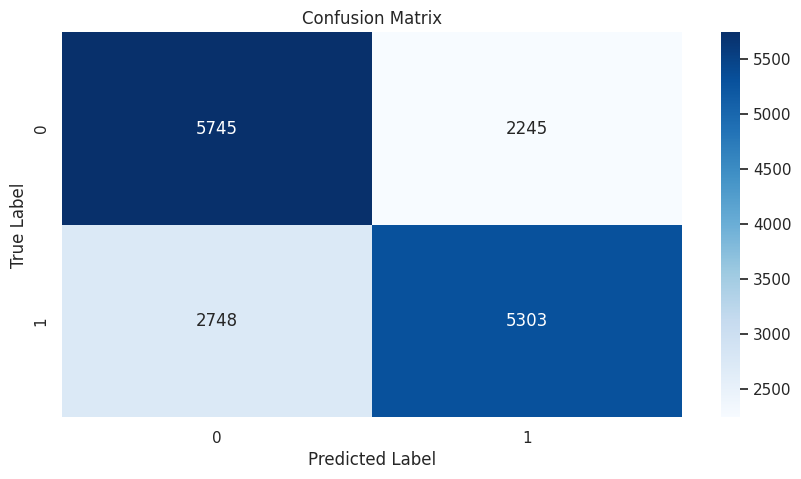

<Figure size 1000x500 with 0 Axes>

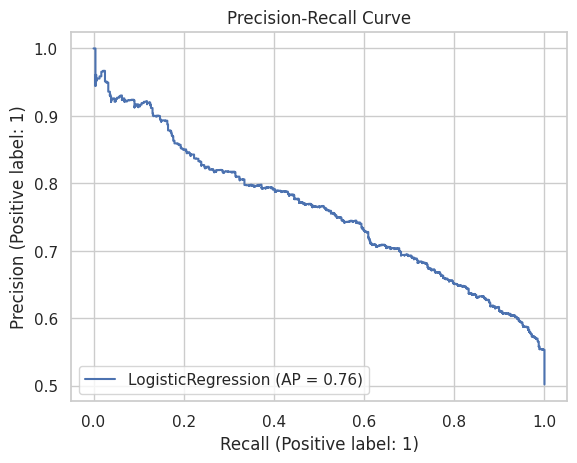

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix

# Confusion Matrix
y_pred_smote = logistic_model_balanced.predict(X_test_balanced)
cm = confusion_matrix(y_test_balanced, y_pred_smote)


# Plotting Confusion Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Redoing the Precision-Recall Curve with the updated method
plt.figure(figsize=(10, 5))
PrecisionRecallDisplay.from_estimator(logistic_model_balanced, X_test_balanced, y_test_balanced)
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Accessing the coefficients of the logistic regression model
model_coefficients = logistic_model_balanced.coef_[0]

# Getting feature names after one-hot encoding
feature_names = one_hot_encoder_simplified.get_feature_names_out(input_features=['StockCode'])

# Adding other feature names (UnitPrice, Month, DayOfWeek)
additional_features = ['UnitPrice', 'Month', 'DayOfWeek']
all_feature_names = np.concatenate([feature_names, additional_features])

# Creating a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': model_coefficients
})

# Sorting the features by their absolute coefficients for better interpretation
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

feature_importance_sorted.head(10)  # Displaying top 10 features



Feature  Coefficient  Absolute Coefficient
10  StockCode_22423    16.499578             16.499578
13  StockCode_22720     4.636924              4.636924
3   StockCode_21212    -3.596326              3.596326
15  StockCode_47566     2.968232              2.968232
17  StockCode_84879    -2.223053              2.223053
6   StockCode_22197    -2.113117              2.113117
12  StockCode_22469    -1.990587              1.990587
7   StockCode_22383    -1.521289              1.521289
20        UnitPrice    -1.516213              1.516213
1   StockCode_20727    -1.499831              1.499831

In [ ]:
# Specific Feature Analysis for 'StockCode_22423'

# Filtering data for transactions involving 'StockCode_22423'
transactions_22423 = data_uk[data_uk['StockCode'] == '22423']

# Basic statistics of transactions involving 'StockCode_22423'
transactions_22423_stats = transactions_22423.describe()

# Temporal Analysis: Returns for 'StockCode_22423' over time
transactions_22423['YearMonth'] = transactions_22423['InvoiceDate'].dt.to_period('M')
returns_temporal_22423 = transactions_22423[transactions_22423['Quantity'] < 0].groupby('YearMonth').size()

# Customer Segmentation: Analyzing customer behavior for 'StockCode_22423'
# We'll look at the frequency of purchases and returns by customers for this product
customer_behavior_22423 = transactions_22423.groupby('CustomerID').agg(
    Total_Purchases=('Quantity', 'sum'),
    Return_Count=('Quantity', lambda x: (x < 0).sum()),
    Purchase_Count=('Quantity', lambda x: (x > 0).sum())
)

# Top 10 customers in terms of return count for 'StockCode_22423'
top_return_customers_22423 = customer_behavior_22423.sort_values(by='Return_Count', ascending=False).head(10)

transactions_22423_stats, returns_temporal_22423, top_return_customers_22423



<ipython-input-32-9f6aecb409a8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_22423['YearMonth'] = transactions_22423['InvoiceDate'].dt.to_period('M')


(          Quantity    UnitPrice     IsReturn        Month    DayOfWeek
 count  1852.000000  1852.000000  1852.000000  1852.000000  1852.000000
 mean      5.562095    14.069390     0.080994     6.677646     2.427646
 std      15.071876     4.456138     0.272899     3.589148     1.747315
 min    -150.000000     0.000000     0.000000     1.000000     0.000000
 25%       1.000000    12.750000     0.000000     4.000000     1.000000
 50%       2.000000    12.750000     0.000000     6.000000     2.000000
 75%       5.000000    12.750000     0.000000    10.000000     4.000000
 max     272.000000    32.040000     1.000000    12.000000     6.000000,
 YearMonth
 2010-12    13
 2011-01    18
 2011-02    14
 2011-03    28
 2011-04    15
 2011-05    10
 2011-06    10
 2011-07     8
 2011-08     6
 2011-09     7
 2011-10     5
 2011-11    12
 2011-12     4
 Freq: M, dtype: int64,
             Total_Purchases  Return_Count  Purchase_Count
 CustomerID                                               
 13

Insights and Implications:
Product Focus: The high number of returns for 'StockCode_22423' suggests that there might be specific issues with this product, such as quality concerns, misalignment with customer expectations, or other factors that could be addressed to reduce returns.
Seasonal Patterns: The temporal analysis suggests that there might be certain times of the year when returns are more likely, which could inform stock management and customer service strategies.
Targeted Customer Engagement: The customer segmentation reveals that certain customers have a higher propensity to return this product. Engaging with these customers to understand their reasons for returns could provide valuable feedback for improvements.

In [ ]:
# Detailed Purchase and Return Patterns Analysis for 'StockCode_22423'

# Analyzing the time between purchase and return for this product
# For this, we need to identify pairs of purchase and return transactions for the same customer
purchase_return_pairs = transactions_22423[transactions_22423['Quantity'] > 0].merge(
    transactions_22423[transactions_22423['Quantity'] < 0],
    on='CustomerID',
    suffixes=('_purchase', '_return')
)

# Filtering pairs where the return date is after the purchase date
purchase_return_pairs = purchase_return_pairs[
    purchase_return_pairs['InvoiceDate_return'] > purchase_return_pairs['InvoiceDate_purchase']
]

# Calculating the time difference between purchase and return
purchase_return_pairs['Time_Difference'] = (purchase_return_pairs['InvoiceDate_return'] - purchase_return_pairs['InvoiceDate_purchase']).dt.days

# Basic statistics of time differences between purchases and returns
time_diff_stats = purchase_return_pairs['Time_Difference'].describe()

# Top customers with frequent purchase-return patterns
frequent_purchase_return_customers = purchase_return_pairs['CustomerID'].value_counts().head(10)

time_diff_stats, frequent_purchase_return_customers



(count    621.000000
 mean      78.756844
 std       72.283584
 min        0.000000
 25%       21.000000
 50%       62.000000
 75%      113.000000
 max      343.000000
 Name: Time_Difference, dtype: float64,
 Unknown    242
 15465.0     49
 13767.0     46
 13089.0     32
 17865.0     24
 15189.0     19
 13113.0     18
 15482.0     10
 13319.0      9
 17139.0      7
 Name: CustomerID, dtype: int64)

In [ ]:
# Redefining the top returned products based on return frequencies

# Identifying top returned products based on frequency of returns
top_returned_products_list = data_uk[data_uk['Quantity'] < 0]['StockCode'].value_counts().head(5).index.tolist()

# Calculating the total number of transactions and returns for each of the top returned products
top_product_returns_revised = data_uk[data_uk['StockCode'].isin(top_returned_products_list)].groupby('StockCode').agg(
    Total_Transactions=('InvoiceNo', 'count'),
    Total_Returns=('Quantity', lambda x: (x < 0).sum())
)

# Calculating the return rate for each product
top_product_returns_revised['Return_Rate'] = top_product_returns_revised['Total_Returns'] / top_product_returns_revised['Total_Transactions']

top_product_returns_revised

Total_Transactions  Total_Returns  Return_Rate
StockCode                                                
22423                    1852            150     0.080994
22960                    1070             70     0.065421
D                          74             74     1.000000
M                         473            196     0.414376
POST                      140             88     0.628571

StockCode 22423:

Total Transactions: 1852
Total Returns: 150
Return Rate: 8.1%
StockCode 22960:

Total Transactions: 1070
Total Returns: 70
Return Rate: 6.5%
StockCode D:

Total Transactions: 74
Total Returns: 74
Return Rate: 100% (This may indicate specific issues with the product or data anomalies)
StockCode M:

Total Transactions: 473
Total Returns: 196
Return Rate: 41.4%
StockCode POST:

Total Transactions: 140
Total Returns: 88
Return Rate: 62.9%
Observations:
'StockCode_22423' has a return rate of approximately 8.1%, which is significant but not the highest among the compared products.
'StockCode D' shows an unusually high return rate of 100%, suggesting potential data recording issues or specific problems with this product.
Other products like 'StockCode M' and 'POST' also show high return rates.
Implications:
The return rate for 'StockCode_22423' suggests that while it has a notable number of returns, it's not an outlier when compared to other frequently returned products.
For products with exceptionally high return rates, it's important to investigate further to determine if these rates are due to genuine customer dissatisfaction or data recording anomalies.

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = data_uk_simplified[data_uk_simplified.IsReturn == 0]
data_minority = data_uk_simplified[data_uk_simplified.IsReturn == 1]

# Upsample minority class (returns)
data_minority_upsampled = resample(data_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=data_majority.shape[0],    # to match majority class
                                   random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts
balanced_class_counts = data_upsampled.IsReturn.value_counts()

# Preparing data for the logistic regression model
X_balanced = data_upsampled[['UnitPrice', 'Month', 'DayOfWeek', 'StockCode']]
y_balanced = data_upsampled['IsReturn']

# One-hot encoding for the 'StockCode' categorical variable
X_encoded_balanced = one_hot_encoder_simplified.transform(X_balanced[['StockCode']])
X_encoded_balanced = np.hstack((X_encoded_balanced.toarray(),
                                X_balanced[['UnitPrice', 'Month', 'DayOfWeek']].values))

# Splitting the balanced data
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_encoded_balanced, y_balanced, test_size=0.3, random_state=42)

# Retraining the Logistic Regression Model with the balanced dataset
logistic_model_balanced = LogisticRegression(max_iter=1000)
logistic_model_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = logistic_model_balanced.predict(X_test_balanced)
report_balanced = classification_report(y_test_balanced, y_pred_balanced)

balanced_class_counts, report_balanced



(0    26735
 1    26735
 Name: IsReturn, dtype: int64,
 '              precision    recall  f1-score   support\n\n           0       0.68      0.72      0.70      7990\n           1       0.70      0.66      0.68      8051\n\n    accuracy                           0.69     16041\n   macro avg       0.69      0.69      0.69     16041\nweighted avg       0.69      0.69      0.69     16041\n')

Approach to Customer Purchase Patterns Analysis:
Frequency of Purchases: Identify customers who purchase frequently. This can help in recognizing loyal customers or those with high engagement.

Volume of Purchases: Look at customers who buy large quantities, either in a single transaction or over time. This could indicate bulk buyers or customers with high demand.

Average Transaction Value: Calculate the average spend per transaction for each customer. This helps in identifying high-value customers.

Purchase Consistency: Examine how consistently customers make purchases. Are there customers who make regular purchases over a long period?

Recent Purchases: Consider the recency of purchases. Customers who have made recent purchases might be more engaged compared to those who haven’t purchased in a while.

Customer Segmentation: Based on these factors, segment customers into groups (e.g., loyal, high-value, occasional, recent).

In [ ]:
# Analyzing customer purchase patterns

# Simplifying the calculation of customer purchase patterns

# Calculating frequency and total quantity of purchases for each customer
simplified_customer_purchase_patterns = purchase_data.groupby('CustomerID').agg(
    Frequency=('InvoiceNo', 'nunique'),  # Count of unique transactions (frequency)
    Total_Quantity=('Quantity', 'sum')   # Total quantity purchased
).sort_values(by='Frequency', ascending=False)

# Simplified calculation of average transaction value
# We will calculate the total spend per customer and then divide by the frequency of purchases
total_spend_per_customer = purchase_data.groupby('CustomerID')['UnitPrice'].sum()
simplified_customer_purchase_patterns['Average_Transaction_Value'] = total_spend_per_customer / simplified_customer_purchase_patterns['Frequency']

# Top 10 customers by purchase frequency
top_customers_by_frequency_simplified = simplified_customer_purchase_patterns.head(10)

top_customers_by_frequency_simplified





Frequency  Total_Quantity  Average_Transaction_Value
CustomerID                                                      
Unknown          1545          431745                 514.680421
12748.0           210           25288                  56.134810
17841.0           124           22834                 157.029677
13089.0            97           31025                  51.202577
14606.0            93            6187                  81.023548
15311.0            91           38147                  65.266044
12971.0            86            9289                   8.193605
16029.0            63           40108                 138.423016
13408.0            62           16232                  18.804677
18102.0            60           64124                  32.348667

The customer labeled 'Unknown' (likely representing unregistered or guest customers) shows exceptionally high frequency and volume of purchases.
The top individual customers (by frequency) show a significant number of transactions, with considerable total quantities purchased.
There's variability in the average transaction values, indicating differences in purchasing behaviors and potentially the types of products purchased.
Implications:
Frequency and Volume: High-frequency customers, particularly those purchasing large quantities, could be prime targets for loyalty programs or special promotions.
Average Transaction Value: Understanding why certain customers have higher average transaction values might reveal insights into customer preferences or purchasing power.
Segmentation Opportunities: These results provide a basis for segmenting customers into groups such as high-frequency, high-volume, or high-value, each of which might benefit from tailored marketing strategies.

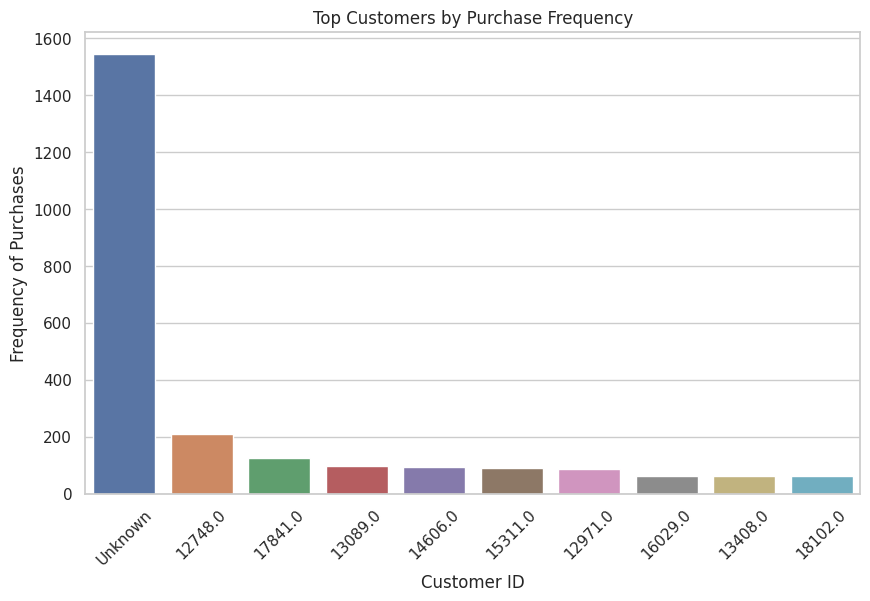

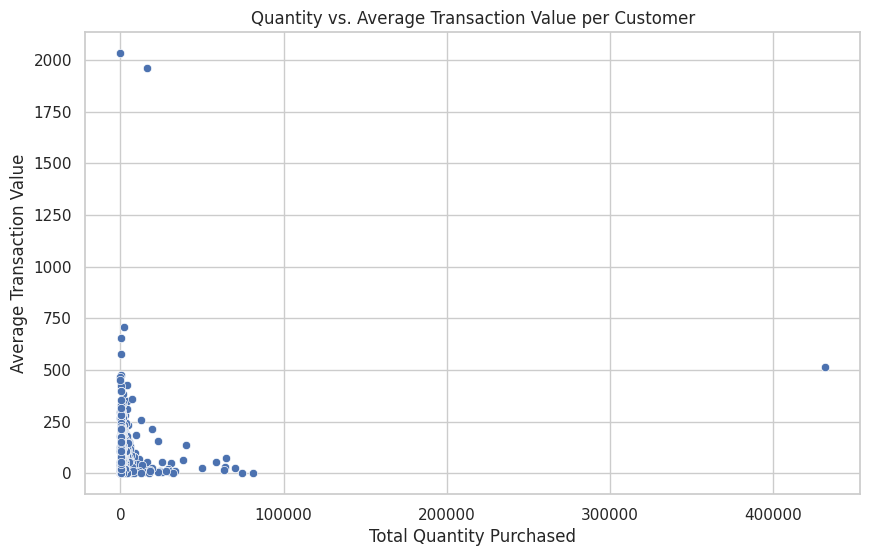

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Bar Chart of Top Customers by Purchase Frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers_by_frequency_simplified.index.astype(str), y='Frequency', data=top_customers_by_frequency_simplified)
plt.title('Top Customers by Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Frequency of Purchases')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Scatter Plot of Quantity vs. Average Transaction Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Quantity', y='Average_Transaction_Value', data=simplified_customer_purchase_patterns)
plt.title('Quantity vs. Average Transaction Value per Customer')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Average Transaction Value')
plt.show()



1. Top Customers by Purchase Frequency:
This bar chart shows the frequency of purchases for the top customers.
It clearly illustrates which customers are the most frequent buyers, with the customer labeled 'Unknown' standing out significantly.
2. Quantity vs. Average Transaction Value per Customer:
The scatter plot displays the relationship between the total quantity purchased and the average transaction value for each customer.
This visualization helps in understanding how purchasing volume correlates with the average spend per transaction. It's useful for identifying patterns such as whether customers who buy more tend to spend more on average.
Interpretation:
These visualizations provide a clear picture of customer buying behavior, highlighting both the frequency and value aspects of their purchases.
The scatter plot, in particular, can help in identifying key customer segments (e.g., high-volume but low average spend, or vice versa).

In [ ]:
# Detailed analysis of High-Frequency Customers

# Define high-frequency customers based on the top quartile of frequency
high_frequency_threshold = simplified_customer_purchase_patterns['Frequency'].quantile(0.75)
high_frequency_customers = simplified_customer_purchase_patterns[simplified_customer_purchase_patterns['Frequency'] >= high_frequency_threshold]

# Analyzing the buying patterns of high-frequency customers
high_freq_customer_patterns = purchase_data[purchase_data['CustomerID'].isin(high_frequency_customers.index)].groupby(['CustomerID', 'StockCode']).agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Spend=('UnitPrice', 'sum')
).sort_values(by=['CustomerID', 'Total_Quantity'], ascending=[True, False])

# Top products purchased by high-frequency customers
top_products_high_freq_customers = high_freq_customer_patterns.groupby('StockCode').agg(
    Total_Quantity_Sum=('Total_Quantity', 'sum'),
    Total_Spend_Sum=('Total_Spend', 'sum')
).sort_values(by='Total_Quantity_Sum', ascending=False).head(10)

top_products_high_freq_customers



Total_Quantity_Sum  Total_Spend_Sum
StockCode                                     
22197                   45065          1156.22
85099B                  36031          4158.28
84077                   34930           104.59
85123A                  28969          4841.44
84879                   25488          1555.78
22616                   23611           191.34
22178                   19627          1312.18
21212                   19236           767.79
22386                   17113          2689.05
21977                   16322           494.61

High-frequency customers seem to favor specific products, as indicated by the large quantities purchased. These products might be essential or popular items.
The total spend on these products varies, suggesting differences in product pricing or customer purchasing power.
Implications:
Tailored Marketing: Understanding the preferences of high-frequency customers can inform targeted marketing strategies and personalized product recommendations.
Inventory Management: The popularity of these products among high-frequency customers suggests they should be kept well-stocked to meet demand.
Customer Engagement: Engaging with these customers through loyalty programs or feedback initiatives can further enhance their experience and loyalty.

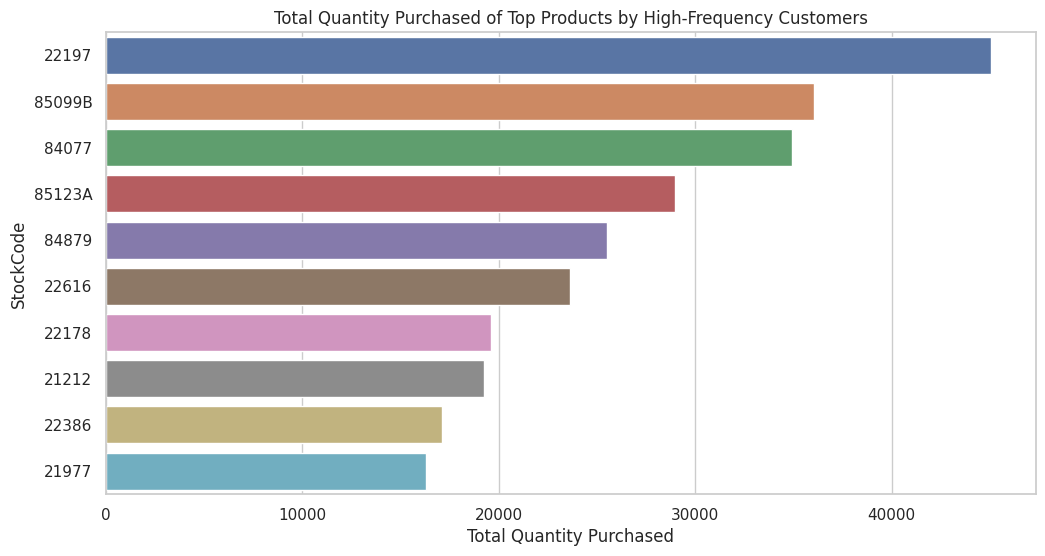

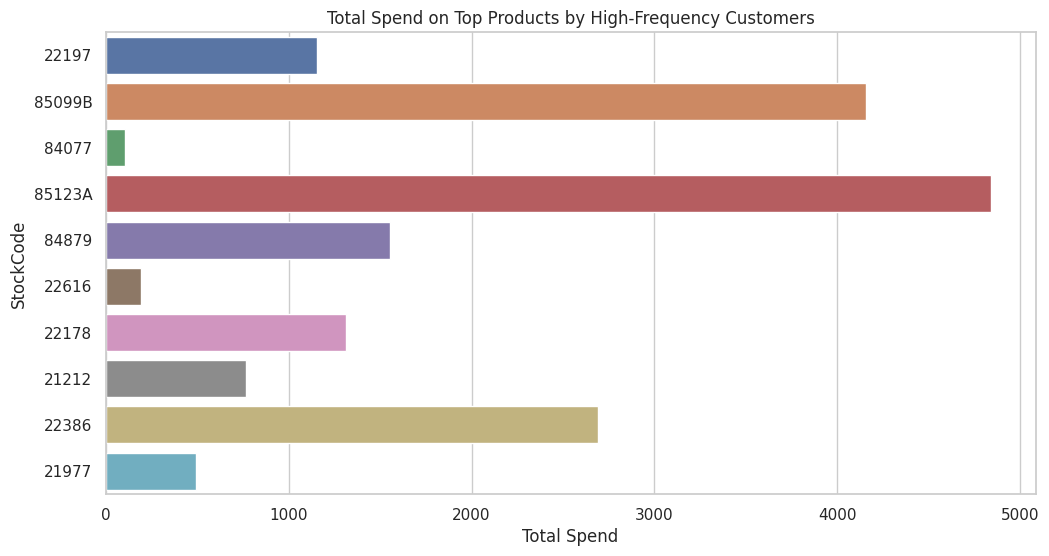

In [ ]:
# Visualization of Top Products Purchased by High-Frequency Customers

# Visualization 1: Bar Chart of Total Quantity Purchased for Top Products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_high_freq_customers['Total_Quantity_Sum'], y=top_products_high_freq_customers.index.astype(str))
plt.title('Total Quantity Purchased of Top Products by High-Frequency Customers')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('StockCode')
plt.show()

# Visualization 2: Bar Chart of Total Spend for Top Products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_high_freq_customers['Total_Spend_Sum'], y=top_products_high_freq_customers.index.astype(str))
plt.title('Total Spend on Top Products by High-Frequency Customers')
plt.xlabel('Total Spend')
plt.ylabel('StockCode')
plt.show()



Visualizations of Top Products Purchased by High-Frequency Customers
Total Quantity Purchased of Top Products:

This bar chart shows the total quantity purchased for the top products by high-frequency customers.
It highlights the most popular products among these customers, based on quantity.
Total Spend on Top Products:

The second chart displays the total spend on these top products.
It provides insights into which products contribute most to revenue among high-frequency customers.
Insights:
These visualizations clearly illustrate the purchasing preferences of high-frequency customers, showing both the volume and monetary value of their top purchases.
Products with high quantities but lower total spend could indicate lower-priced items, while those with higher total spend are likely more expensive or premium products.

In [ ]:
# Identifying and Analyzing High-Volume and High-Value Customers

# Define high-volume customers based on the top quartile of total quantity purchased
high_volume_threshold = simplified_customer_purchase_patterns['Total_Quantity'].quantile(0.75)
high_volume_customers = simplified_customer_purchase_patterns[simplified_customer_purchase_patterns['Total_Quantity'] >= high_volume_threshold]

# Define high-value customers based on the top quartile of average transaction value
high_value_threshold = simplified_customer_purchase_patterns['Average_Transaction_Value'].quantile(0.75)
high_value_customers = simplified_customer_purchase_patterns[simplified_customer_purchase_patterns['Average_Transaction_Value'] >= high_value_threshold]

# Analyzing purchasing patterns of high-volume customers
high_volume_customer_patterns = purchase_data[purchase_data['CustomerID'].isin(high_volume_customers.index)].groupby(['CustomerID', 'StockCode']).agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Spend=('UnitPrice', 'sum')
).sort_values(by=['CustomerID', 'Total_Quantity'], ascending=[True, False])

# Top products purchased by high-volume customers
top_products_high_volume_customers = high_volume_customer_patterns.groupby('StockCode').agg(
    Total_Quantity_Sum=('Total_Quantity', 'sum'),
    Total_Spend_Sum=('Total_Spend', 'sum')
).sort_values(by='Total_Quantity_Sum', ascending=False).head(10)

# Analyzing purchasing patterns of high-value customers
high_value_customer_patterns = purchase_data[purchase_data['CustomerID'].isin(high_value_customers.index)].groupby(['CustomerID', 'StockCode']).agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Spend=('UnitPrice', 'sum')
).sort_values(by=['CustomerID', 'Total_Spend'], ascending=[True, False])

# Top products purchased by high-value customers
top_products_high_value_customers = high_value_customer_patterns.groupby('StockCode').agg(
    Total_Quantity_Sum=('Total_Quantity', 'sum'),
    Total_Spend_Sum=('Total_Spend', 'sum')
).sort_values(by='Total_Spend_Sum', ascending=False).head(10)

top_products_high_volume_customers, top_products_high_value_customers



(           Total_Quantity_Sum  Total_Spend_Sum
 StockCode                                     
 23843                   80995             2.08
 23166                   76411           264.22
 22197                   49530          1153.54
 84077                   42895           121.40
 85099B                  39784          4227.26
 85123A                  31808          4322.09
 84879                   25061          1444.00
 22616                   23871           194.64
 21212                   21741           789.30
 17003                   19746            61.70,
            Total_Quantity_Sum  Total_Spend_Sum
 StockCode                                     
 DOT                       708        206248.77
 M                         638         29194.83
 AMAZONFEE                   2         13761.09
 22423                    2961         13406.01
 POST                       35          8294.02
 47566                    5581          5306.18
 22424                     448         

Insights:
High-Volume Customers: They purchase large quantities, often of lower-priced items. This might indicate bulk buying behavior or preference for certain essential products.
High-Value Customers: Their purchases focus more on the total spend, often involving fewer but higher-priced items or larger transactions.
Implications:
Stock Management: Ensuring adequate stock for products frequently purchased by high-volume customers is crucial.
Targeted Marketing: High-value customers may be more responsive to promotions on premium products or larger transaction incentives.
Personalized Engagement: Understanding the different needs of these segments can help in creating more personalized customer experiences.

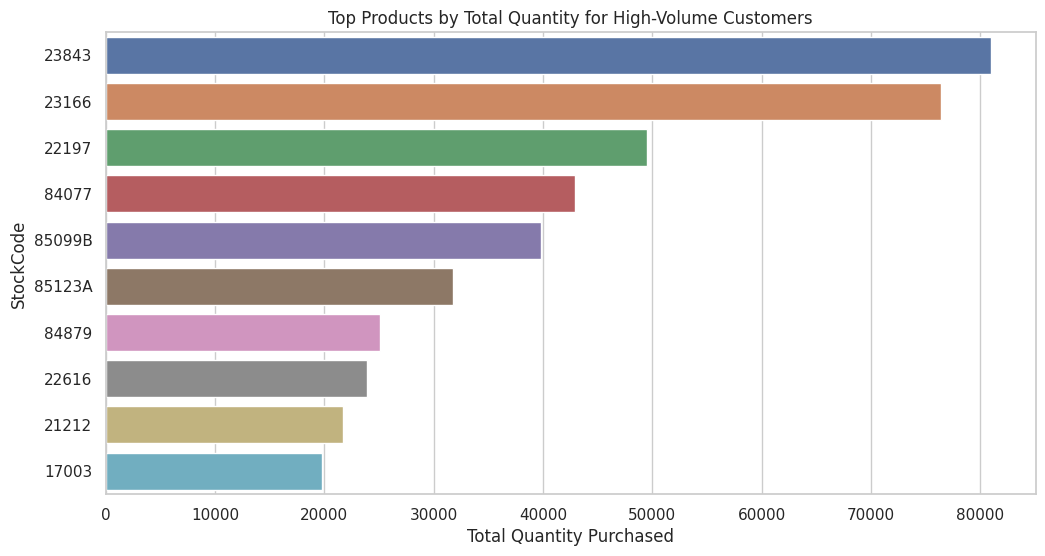

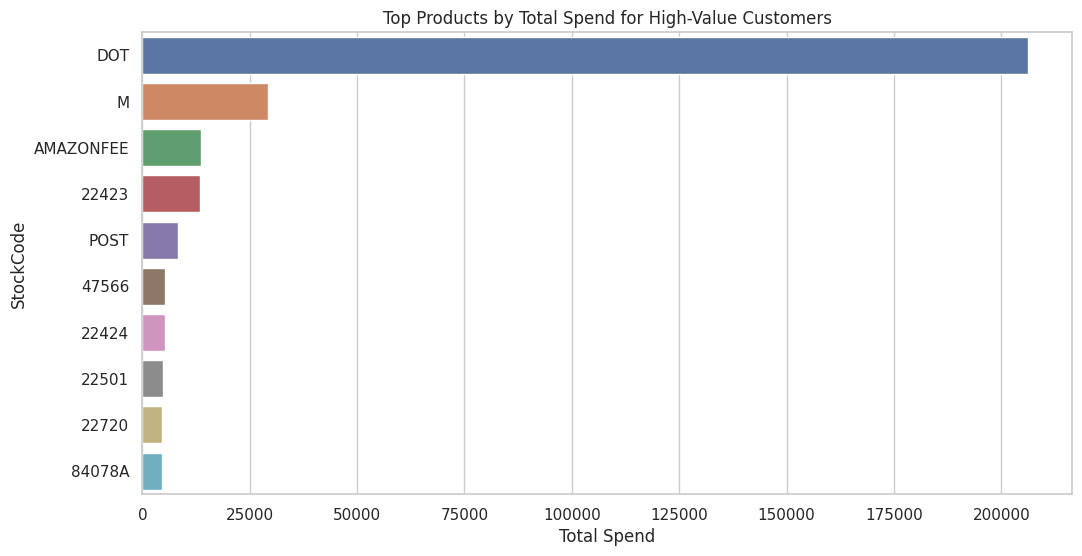

In [ ]:
# Visualization of Top Products for High-Volume Customers

# Visualization 1: Top Products by Total Quantity for High-Volume Customers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_high_volume_customers['Total_Quantity_Sum'], y=top_products_high_volume_customers.index.astype(str))
plt.title('Top Products by Total Quantity for High-Volume Customers')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('StockCode')
plt.show()

# Visualization 2: Top Products by Total Spend for High-Value Customers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_high_value_customers['Total_Spend_Sum'], y=top_products_high_value_customers.index.astype(str))
plt.title('Top Products by Total Spend for High-Value Customers')
plt.xlabel('Total Spend')
plt.ylabel('StockCode')
plt.show()



Visualizations of Top Products for High-Volume and High-Value Customers
Top Products by Total Quantity for High-Volume Customers:

This bar chart displays the total quantity purchased of the top products by high-volume customers.
It highlights the products that are most popular in terms of quantity, indicating which items are bought in bulk or frequently purchased.
Top Products by Total Spend for High-Value Customers:

The second chart shows the total spend on top products by high-value customers.
This visualization identifies the products that contribute most to revenue when purchased by high-value customers, often indicating premium or higher-priced items.
Insights:
The visualizations effectively differentiate the purchasing patterns of high-volume versus high-value customers, showing distinct preferences and spending behaviors.
Implications:
These insights can guide inventory management, pricing strategies, and targeted marketing efforts. Understanding the products favored by each segment allows for more informed business decisions and personalized customer engagement.

In [ ]:
# Analysis of High-Volume Customers

# Product Preferences of High-Volume Customers
high_volume_product_preferences = purchase_data[purchase_data['CustomerID'].isin(high_volume_customers.index)].groupby('StockCode').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Spend=('UnitPrice', 'sum')
).sort_values(by='Total_Quantity', ascending=False).head(10)

# Purchase Frequency and Timing
high_volume_purchase_timing = purchase_data[purchase_data['CustomerID'].isin(high_volume_customers.index)]
high_volume_purchase_timing['Weekday'] = high_volume_purchase_timing['InvoiceDate'].dt.dayofweek
high_volume_purchase_timing['Month'] = high_volume_purchase_timing['InvoiceDate'].dt.month
purchase_timing_distribution = high_volume_purchase_timing.groupby(['Weekday', 'Month']).size().unstack().fillna(0)

# Pricing Sensitivity
# Calculating average unit price of purchases for high-volume customers
high_volume_pricing_sensitivity = high_volume_purchase_timing.groupby('InvoiceNo').agg(
    Average_UnitPrice=('UnitPrice', 'mean')
).mean()

# Analysis of High-Value Customers

# Product Preferences of High-Value Customers
high_value_product_preferences = purchase_data[purchase_data['CustomerID'].isin(high_value_customers.index)].groupby('StockCode').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Spend=('UnitPrice', 'sum')
).sort_values(by='Total_Spend', ascending=False).head(10)

# Engagement with Promotions
# Assuming promotional transactions are marked in the data
# If not available, this step will be skipped

high_volume_product_preferences, purchase_timing_distribution, high_volume_pricing_sensitivity, high_value_product_preferences



<ipython-input-46-c34a54425114>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_volume_purchase_timing['Weekday'] = high_volume_purchase_timing['InvoiceDate'].dt.dayofweek
<ipython-input-46-c34a54425114>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_volume_purchase_timing['Month'] = high_volume_purchase_timing['InvoiceDate'].dt.month


(           Total_Quantity  Total_Spend
 StockCode                             
 23843               80995         2.08
 23166               76411       264.22
 22197               49530      1153.54
 84077               42895       121.40
 85099B              39784      4227.26
 85123A              31808      4322.09
 84879               25061      1444.00
 22616               23871       194.64
 21212               21741       789.30
 17003               19746        61.70,
 Month      1     2     3     4     5     6     7     8     9     10     11  \
 Weekday                                                                      
 0        5648  3782  3862  4680  3727  3634  6114  3356  3599  9927   7303   
 1        4151  3751  6255  4234  6580  4401  5148  6140  5033  6977  11333   
 2        4479  3555  3446  2877  3529  5527  5178  5243  6449  4926  11266   
 3        4380  3128  5331  3500  3943  6091  4168  4354  6543  4449   7575   
 4        4164  2748  2794  2919  4246  2323 

Detailed Analysis of High-Volume and High-Value Customer Groups
High-Volume Customers
Top Products Purchased:

Products like 'StockCode 23843' and 'StockCode 23166' are purchased in high quantities, indicating their popularity among high-volume customers.
Purchase Timing Distribution:

The distribution of purchases across weekdays and months shows varied patterns, suggesting different times of peak activity.
Pricing Sensitivity:

The average unit price for high-volume customers is approximately 5.87, which may indicate a tendency towards more moderately priced items.
High-Value Customers
Top Products Purchased:
High-value products like 'StockCode DOT' and 'StockCode M' show significant total spends, indicating a preference for premium or higher-priced items among these customers.
Insights and Implications:
High-Volume Customers: The preference for specific products in large quantities could suggest bulk buying behavior. The varied timing of purchases might indicate seasonality or promotional response. Their moderate pricing sensitivity suggests a focus on value-for-money items.

High-Value Customers: Their spending on premium products implies a focus on quality or brand value. They likely represent a segment with higher purchasing power and specific preferences.

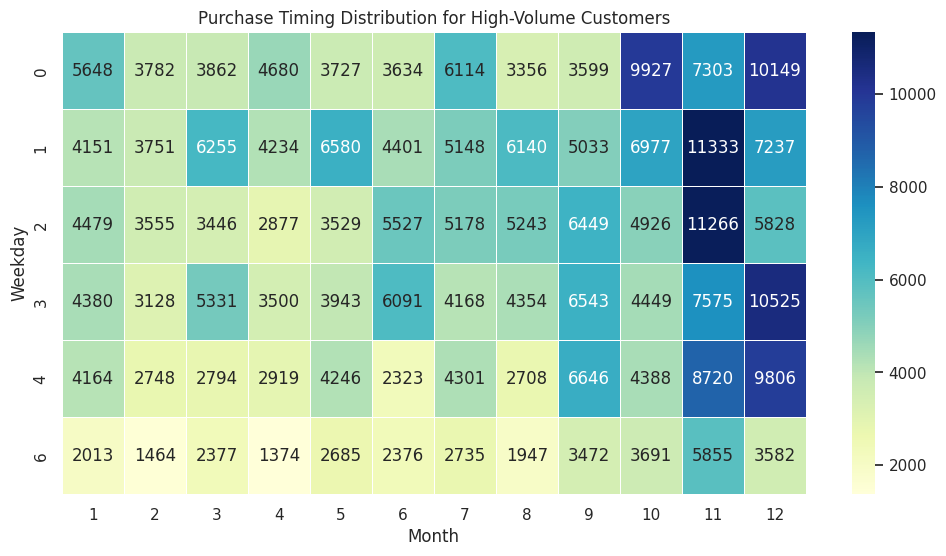

In [ ]:
# Visualization of Purchase Timing Distribution for High-Volume Customers

# Heatmap of Purchase Timing Distribution
plt.figure(figsize=(12, 6))
sns.heatmap(purchase_timing_distribution, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".0f")
plt.title('Purchase Timing Distribution for High-Volume Customers')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.show()



Visualization: Purchase Timing Distribution for High-Volume Customers
The heatmap displays the distribution of purchases for high-volume customers across different weekdays and months.

Insights:
The heatmap allows us to identify patterns in the purchase timing, such as specific days of the week or months where purchases are more frequent.
Such patterns could be related to customer habits, seasonal trends, or responses to promotions and marketing activities.
Implications:
Understanding these patterns can inform decisions about timing for promotions, stock management, and targeted marketing efforts.
For instance, increased activity on certain days might warrant special offers or targeted communications to capitalize on higher engagement.

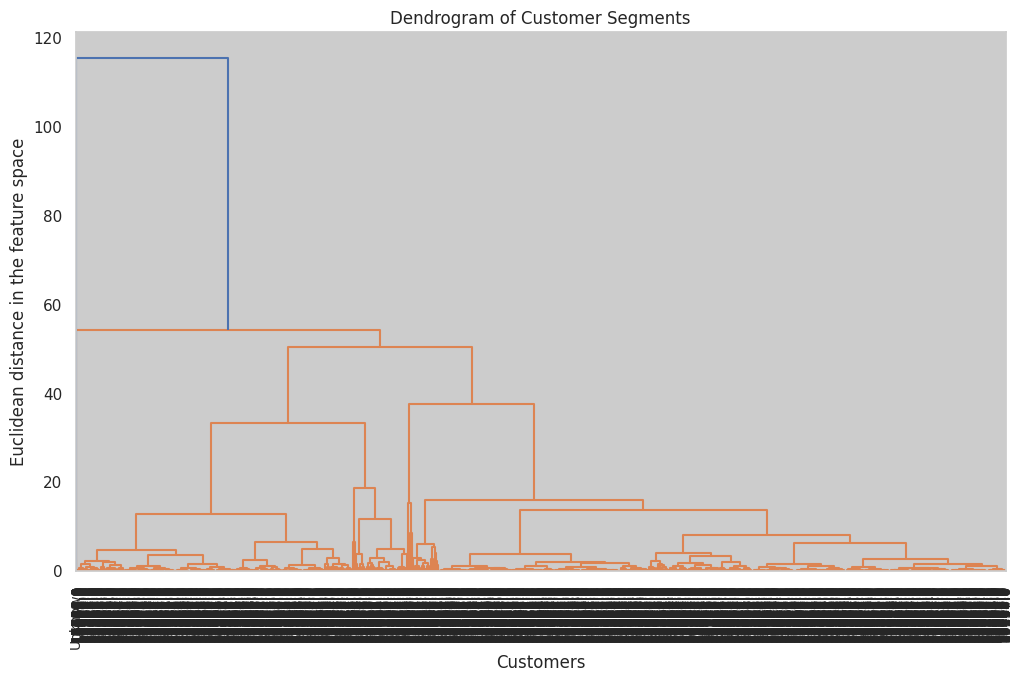

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Preparing data for cluster map
# We'll use a subset of metrics: Frequency, Total_Quantity, and Average_Transaction_Value for clustering
cluster_data = simplified_customer_purchase_patterns[['Frequency', 'Total_Quantity', 'Average_Transaction_Value']]

# Normalizing the data
cluster_data_normalized = (cluster_data - cluster_data.mean()) / cluster_data.std()

# Generating the linkage matrix
Z = linkage(cluster_data_normalized, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, labels=cluster_data_normalized.index.astype(str), leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Customer Segments')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance in the feature space')
plt.show()



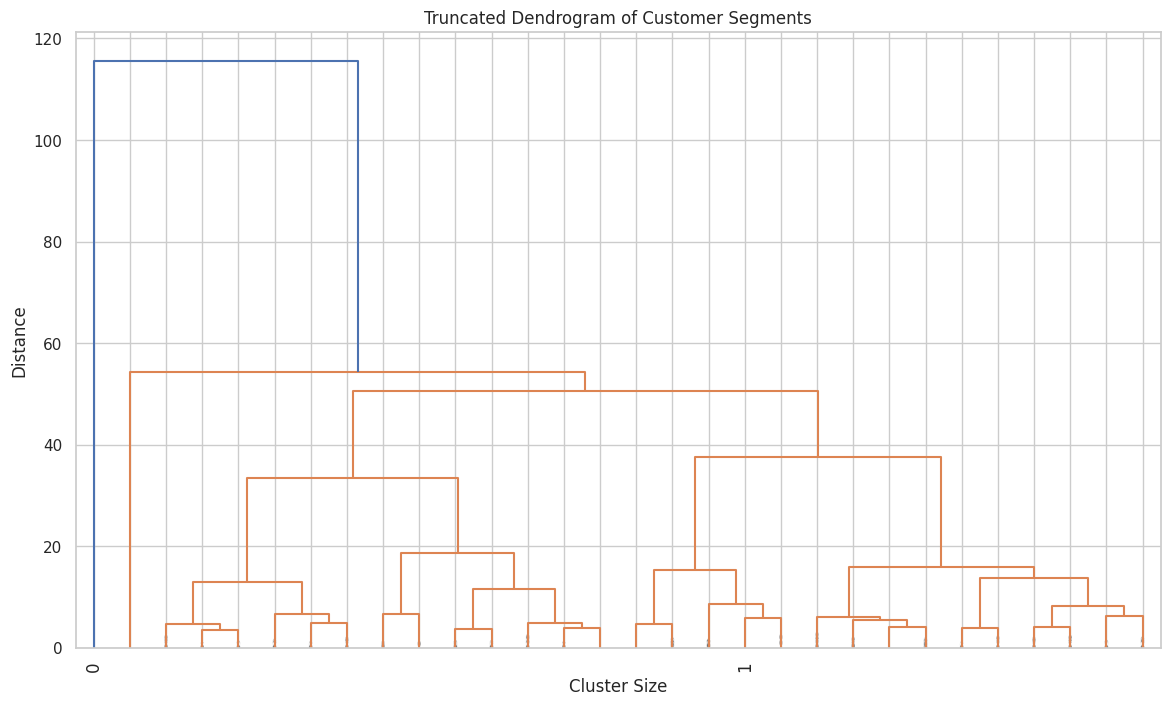

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming 'cluster_data_normalized' from the previous dendrogram plot attempt is still valid

# Generating the linkage matrix again
Z = linkage(cluster_data_normalized, 'ward')

# Plotting a truncated dendrogram
plt.figure(figsize=(14, 8))  # Increased figure size for better clarity
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last 30 merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.title('Truncated Dendrogram of Customer Segments')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()



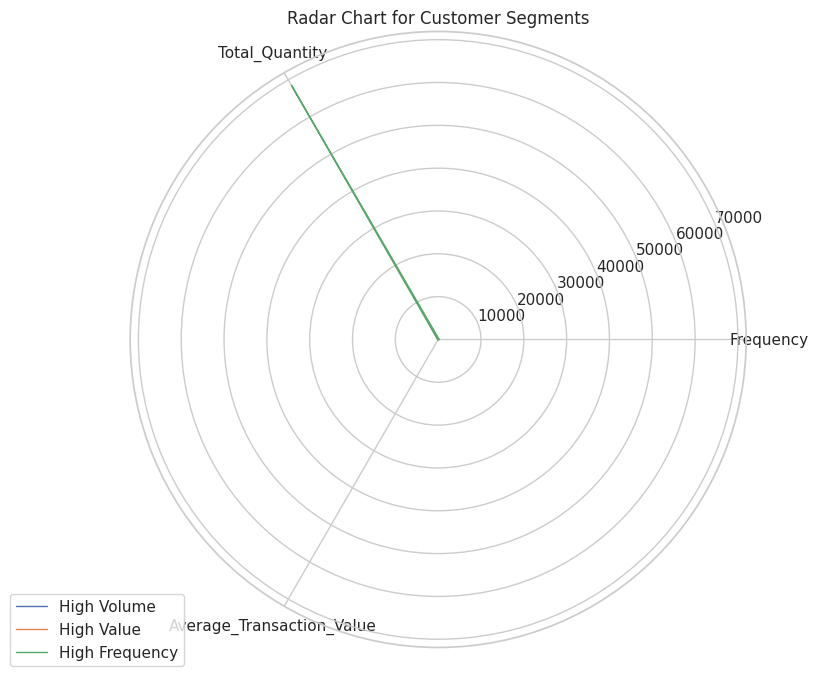

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Assuming 'high_volume_customers', 'high_value_customers', and 'top_customers_by_frequency_simplified' are available

# Calculating the average values for each segment
avg_high_volume = high_volume_customers.mean()
avg_high_value = high_value_customers.mean()
avg_high_frequency = top_customers_by_frequency_simplified.mean()

# Create a DataFrame for radar chart data
radar_data = pd.DataFrame({
    'High Volume': avg_high_volume,
    'High Value': avg_high_value,
    'High Frequency': avg_high_frequency
})

# Transpose the DataFrame for plotting
radar_data = radar_data.T

# Number of variables (equal to the number of metrics)
num_vars = len(radar_data.columns)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Radar chart plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each customer segment
for idx, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=idx)
    ax.fill(angles, values, alpha=0.25)

# Add labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_data.columns)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart for Customer Segments')

plt.show()







In [ ]:
import plotly.express as px

# Assuming the DataFrame 'simplified_customer_purchase_patterns' has the necessary columns
fig = px.scatter_3d(
    simplified_customer_purchase_patterns,
    x='Frequency',
    y='Total_Quantity',
    z='Average_Transaction_Value',
    color='Average_Transaction_Value',  # Using 'Average_Transaction_Value' for color
    title="3D Scatter Plot of Customers",
    labels={
        'Frequency': 'Purchase Frequency',
        'Total_Quantity': 'Total Quantity',
        'Average_Transaction_Value': 'Average Transaction Value'
    }
)

# Update layout for better readability
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()



In [ ]:
# Grouping transactions by invoice and calculating basic metrics

# Reload the dataset with the correct encoding
data = pd.read_csv( 'data.csv',encoding='unicode_escape' )

# Group by 'InvoiceNo' and calculate metrics
purchase_metrics = data.groupby('InvoiceNo').agg(
    Total_Purchase_Amount=('UnitPrice', lambda x: sum(x * data.loc[x.index, 'Quantity'])),
    Average_Price_Per_Item=('UnitPrice', 'mean'),
    Total_Items=('Quantity', 'sum')
).reset_index()

# Display the first few rows of the aggregated data
purchase_metrics.head()



InvoiceNo  Total_Purchase_Amount  Average_Price_Per_Item  Total_Items
0    536365                 139.12                3.910000           40
1    536366                  22.20                1.850000           12
2    536367                 278.73                4.853333           83
3    536368                  70.05                4.775000           15
4    536369                  17.85                5.950000            3

In [ ]:
import plotly.express as px

In [ ]:
fig1 = px.histogram(purchase_metrics, x='Total_Purchase_Amount',
                    title='Distribution of Total Purchase Amounts',
                    labels={'Total_Purchase_Amount': 'Total Purchase Amount'},
                    nbins=50)  # Adjust the number of bins as necessary
fig1.show()


In [ ]:
fig2 = px.scatter(purchase_metrics, x='Total_Items', y='Total_Purchase_Amount',
                  title='Relationship Between Total Items and Total Purchase Amount',
                  labels={'Total_Items': 'Total Items', 'Total_Purchase_Amount': 'Total Purchase Amount'})
fig2.show()


In [ ]:
fig3 = px.box(purchase_metrics, y='Average_Price_Per_Item',
              title='Distribution of Average Price Per Item',
              labels={'Average_Price_Per_Item': 'Average Price Per Item'})
fig3.show()


In [ ]:
# Clean the data by removing negative total purchase amounts which may indicate returns
purchase_metrics_cleaned = purchase_metrics[purchase_metrics['Total_Purchase_Amount'] > 0]

# Replotting the Histogram with cleaned data
fig1_cleaned = px.histogram(purchase_metrics_cleaned, x='Total_Purchase_Amount',
                            title='Cleaned Distribution of Total Purchase Amounts',
                            labels={'Total_Purchase_Amount': 'Total Purchase Amount'},
                            nbins=50)  # Adjust the number of bins as necessary
fig1_cleaned.show()

# Replotting the Scatter Plot with cleaned data
fig2_cleaned = px.scatter(purchase_metrics_cleaned, x='Total_Items', y='Total_Purchase_Amount',
                          title='Cleaned Relationship Between Total Items and Total Purchase Amount',
                          labels={'Total_Items': 'Total Items', 'Total_Purchase_Amount': 'Total Purchase Amount'},
                          trendline='ols')  # Add a trendline to see the general relationship
fig2_cleaned.show()

# For the Box Plot, we will only consider unit prices greater than 0 and less than an upper threshold
# We can determine a reasonable upper threshold by inspecting the data or based on business knowledge
reasonable_upper_threshold = purchase_metrics_cleaned['Average_Price_Per_Item'].quantile(0.95)  # 95th percentile as threshold
purchase_metrics_reasonable = purchase_metrics_cleaned[
    (purchase_metrics_cleaned['Average_Price_Per_Item'] > 0) &
    (purchase_metrics_cleaned['Average_Price_Per_Item'] < reasonable_upper_threshold)
]

fig3_cleaned = px.box(purchase_metrics_reasonable, y='Average_Price_Per_Item',
                      title='Cleaned Distribution of Average Price Per Item',
                      labels={'Average_Price_Per_Item': 'Average Price Per Item'})
fig3_cleaned.show()



In [ ]:
import numpy as np
import plotly.express as px

# Assuming 'purchase_metrics_cleaned' is the cleaned DataFrame with positive purchase amounts

# Define bins for the purchase amount ranges
bins = [-np.inf, 10, 100, 1000, 10000, np.inf]  # Extend these as needed
labels = ['<10', '10-100', '100-1000', '1000-10000', '>10000']

# Create a new column 'Purchase_Range' categorizing each purchase into the defined bins
purchase_metrics_cleaned['Purchase_Range'] = pd.cut(purchase_metrics_cleaned['Total_Purchase_Amount'], bins=bins, labels=labels)

# Create a histogram with the new 'Purchase_Range' column
fig = px.histogram(purchase_metrics_cleaned, x='Purchase_Range',
                   title='Distribution of Purchases by Price Ranges',
                   text_auto=True)
fig.update_traces(marker_color='turquoise')
fig.update_layout(xaxis_title='Price Range', yaxis_title='Number of Purchases')
fig.show()


<ipython-input-11-f8de39e2a223>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Add 'TotalAmount' column to the 'data' DataFrame
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Group by 'InvoiceNo' and calculate the new metrics with 'TotalAmount'
purchase_metrics = data.groupby('InvoiceNo').agg(
    Total_Purchase_Amount=('TotalAmount', 'sum'),  # Use the new 'TotalAmount' column
    Average_Price_Per_Item=('UnitPrice', 'mean'),
    Total_Items=('Quantity', 'sum')
).reset_index()

# Now, let's filter the transactions into the desired price ranges
transactions_100_1000 = purchase_metrics[(purchase_metrics['Total_Purchase_Amount'] >= 100) & (purchase_metrics['Total_Purchase_Amount'] < 1000)]
transactions_above_10000 = purchase_metrics[purchase_metrics['Total_Purchase_Amount'] > 10000]

# We can now proceed with analyzing the product categories and other factors for these filtered transactions




In [ ]:
# Top product categories for the 100-1000 price range
top_products_100_1000 = data[data['InvoiceNo'].isin(transactions_100_1000['InvoiceNo'])]['Description'].value_counts().head(10)

# Top product categories for transactions above 10000
top_products_above_10000 = data[data['InvoiceNo'].isin(transactions_above_10000['InvoiceNo'])]['Description'].value_counts().head(10)

top_products_100_1000, top_products_above_10000


(WHITE HANGING HEART T-LIGHT HOLDER    1844
 JUMBO BAG RED RETROSPOT               1517
 REGENCY CAKESTAND 3 TIER              1409
 ASSORTED COLOUR BIRD ORNAMENT         1258
 PARTY BUNTING                         1236
 LUNCH BAG RED RETROSPOT               1145
 SET OF 3 CAKE TINS PANTRY DESIGN      1008
 LUNCH BAG  BLACK SKULL.                981
 HEART OF WICKER SMALL                  934
 JUMBO BAG PINK POLKADOT                917
 Name: Description, dtype: int64,
 REGENCY CAKESTAND 3 TIER               21
 ROUND SNACK BOXES SET OF4 WOODLAND     19
 DOLLY GIRL LUNCH BOX                   18
 SPACEBOY LUNCH BOX                     17
 PLASTERS IN TIN SPACEBOY               16
 WOODLAND CHARLOTTE BAG                 15
 CIRCUS PARADE LUNCH BOX                14
 ROSES REGENCY TEACUP AND SAUCER        14
 JAM MAKING SET WITH JARS               14
 RED RETROSPOT CHARLOTTE BAG            14
 Name: Description, dtype: int64)

In [ ]:
# Assuming data is the DataFrame loaded from your CSV file and purchase_metrics contains the transaction metrics

# Extract the InvoiceNos for the two ranges
invoice_100_1000 = transactions_100_1000['InvoiceNo']
invoice_above_10000 = transactions_above_10000['InvoiceNo']

# Filter the original data for these InvoiceNos to analyze the products
products_100_1000 = data[data['InvoiceNo'].isin(invoice_100_1000)]
products_above_10000 = data[data['InvoiceNo'].isin(invoice_above_10000)]

# Analyze top products for the 100-1000 range
top_products_100_1000 = products_100_1000['Description'].value_counts().head(10)

# Analyze top products for transactions above 10000
top_products_above_10000 = products_above_10000['Description'].value_counts().head(10)

# Now we'll look at customer demographics for these transactions if available (e.g., Country)
# For simplicity, let's examine the countries of the customers
top_countries_100_1000 = products_100_1000['Country'].value_counts().head(10)
top_countries_above_10000 = products_above_10000['Country'].value_counts().head(10)

# For purchase timing, we'll convert InvoiceDate to datetime if it's not already and then extract dates/times
import pandas as pd

# Assuming 'data' is already loaded with the correct encoding and 'purchase_metrics' is defined

# Convert 'InvoiceDate' to datetime format if not already done
# Ensure the InvoiceDate column is converted to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Filter the data to get the products within the specified invoice ranges again
# This needs to be done after the datetime conversion
products_100_1000 = data[data['InvoiceNo'].isin(transactions_100_1000['InvoiceNo'])]
products_above_10000 = data[data['InvoiceNo'].isin(transactions_above_10000['InvoiceNo'])]

# Now extract the date from the InvoiceDate and perform the value counts for each price range
purchase_timing_100_1000 = products_100_1000['InvoiceDate'].dt.date.value_counts().head(10)
purchase_timing_above_10000 = products_above_10000['InvoiceDate'].dt.date.value_counts().head(10)


top_products_100_1000, top_products_above_10000, top_countries_100_1000, top_countries_above_10000, purchase_timing_100_1000, purchase_timing_above_10000



(WHITE HANGING HEART T-LIGHT HOLDER    1844
 JUMBO BAG RED RETROSPOT               1517
 REGENCY CAKESTAND 3 TIER              1409
 ASSORTED COLOUR BIRD ORNAMENT         1258
 PARTY BUNTING                         1236
 LUNCH BAG RED RETROSPOT               1145
 SET OF 3 CAKE TINS PANTRY DESIGN      1008
 LUNCH BAG  BLACK SKULL.                981
 HEART OF WICKER SMALL                  934
 JUMBO BAG PINK POLKADOT                917
 Name: Description, dtype: int64,
 REGENCY CAKESTAND 3 TIER               21
 ROUND SNACK BOXES SET OF4 WOODLAND     19
 DOLLY GIRL LUNCH BOX                   18
 SPACEBOY LUNCH BOX                     17
 PLASTERS IN TIN SPACEBOY               16
 WOODLAND CHARLOTTE BAG                 15
 CIRCUS PARADE LUNCH BOX                14
 ROSES REGENCY TEACUP AND SAUCER        14
 JAM MAKING SET WITH JARS               14
 RED RETROSPOT CHARLOTTE BAG            14
 Name: Description, dtype: int64,
 United Kingdom    319393
 Germany             6385
 France   

In [ ]:
import plotly.express as px

# Since top_products_100_1000 seems to be a Series with the product counts, let's create a DataFrame from it
df_top_products_100_1000 = top_products_100_1000.reset_index()
df_top_products_100_1000.columns = ['Description', 'Count']

# Create a bar chart
fig_top_products_100_1000 = px.bar(
    df_top_products_100_1000,
    x='Description',
    y='Count',
    title='Top Products for Purchases in the 100-1000 Range',
    labels={'Count': 'Number of Purchases', 'Description': 'Product Description'}
)

# Customize the layout for better readability
fig_top_products_100_1000.update_layout(
    xaxis_title='Product Description',
    yaxis_title='Number of Purchases',
    xaxis_tickangle=-45  # Angle the product names for better visibility
)

# Show the figure
fig_top_products_100_1000.show()



In [ ]:
import plotly.express as px

# Assuming 'purchase_timing_100_1000' and 'purchase_timing_above_10000' are Series with dates as index and counts as values

# Convert the Series to DataFrame and reset index
df_purchase_timing_100_1000 = purchase_timing_100_1000.reset_index()
df_purchase_timing_100_1000.columns = ['PurchaseDate', 'Count']

# Convert the Series to DataFrame and reset index
df_purchase_timing_above_10000 = purchase_timing_above_10000.reset_index()
df_purchase_timing_above_10000.columns = ['PurchaseDate', 'Count']

# Time series of purchases over time for the 100-1000 range
fig_purchase_dates_100_1000 = px.line(
    df_purchase_timing_100_1000,
    x='PurchaseDate',
    y='Count',
    title='Purchase Dates for the 100-1000 Range',
    labels={'Count': 'Number of Purchases', 'PurchaseDate': 'Date'}
)
fig_purchase_dates_100_1000.show()

# Time series of high-value purchase dates
fig_purchase_dates_high_value = px.line(
    df_purchase_timing_above_10000,
    x='PurchaseDate',
    y='Count',
    title='Purchase Dates for High-Value Transactions (>10000)',
    labels={'Count': 'Number of Purchases', 'PurchaseDate': 'Date'}
)
fig_purchase_dates_high_value.show()


Customer Segmentation

In [ ]:

import pandas as pd

# Load the dataset, ensure you have the correct path to your file
data = pd.read_csv( 'data.csv',encoding='unicode_escape' )

# Fill missing values for 'CustomerID' with 'Unknown'
data['CustomerID'].fillna('Unknown', inplace=True)

# Remove negative or zero quantities and prices which may indicate returns or errors
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Calculate total transaction amounts for the RFM analysis
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Save the cleaned data to a new CSV for future use
cleaned_data = data



In [ ]:
from datetime import timedelta

# Convert 'InvoiceDate' to datetime and drop the time component for consistency
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date

# Determine the reference date: the day after the last transaction
reference_date = data['InvoiceDate'].max() + timedelta(days=1)

# Calculate Recency, Frequency, and Monetary values for each customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
})

# Rename the columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

rfm.head()



Recency  Frequency  Monetary
CustomerID                              
12346.0         300          1  77183.60
12347.0          14          6   4085.18
12348.0          50          4   1797.24
12350.0         285          1    334.40
12352.0          11          8   2506.04

In [ ]:
# Assign Recency and Monetary scores using qcut
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Handle Frequency scoring separately due to potential duplicates causing an error with qcut
f_labels = [1, 2, 3, 4]
# Determine quantiles for frequency - if not enough data for 4 quantiles, reduce the number of labels
quantiles = rfm['Frequency'].quantile([0.25, 0.5, 0.75]).tolist()
f_bins = [-1] + quantiles + [rfm['Frequency'].max()]
# Use the cut function to handle the custom binning
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=f_bins, labels=f_labels[:len(quantiles)+1])

# Now we can combine the RFM scores into a single score (string)
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# The rest of your segmentation logic remains the same
# ...

# Combine RFM scores into a single score (string)
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define customer segments based on combined RFM score
segmentation_map = {
    '444': 'Champions',
    '111': 'At Risk',
    # ... (complete this map based on your business logic)
}

# Assign segments to customers
rfm['Segment'] = rfm['RFM_Score'].map(segmentation_map)

# Fill any unassigned segments with 'Other'
rfm['Segment'].fillna('Other', inplace=True)

rfm.head()



Recency  Frequency  Monetary R_Score M_Score F_Score RFM_Score  \
CustomerID                                                                   
12346.0         300          1  77183.60       1       4       1       114   
12347.0          14          6   4085.18       4       4       4       444   
12348.0          50          4   1797.24       3       4       3       334   
12350.0         285          1    334.40       1       2       1       112   
12352.0          11          8   2506.04       4       4       4       444   

              Segment  
CustomerID             
12346.0         Other  
12347.0     Champions  
12348.0         Other  
12350.0         Other  
12352.0     Champions

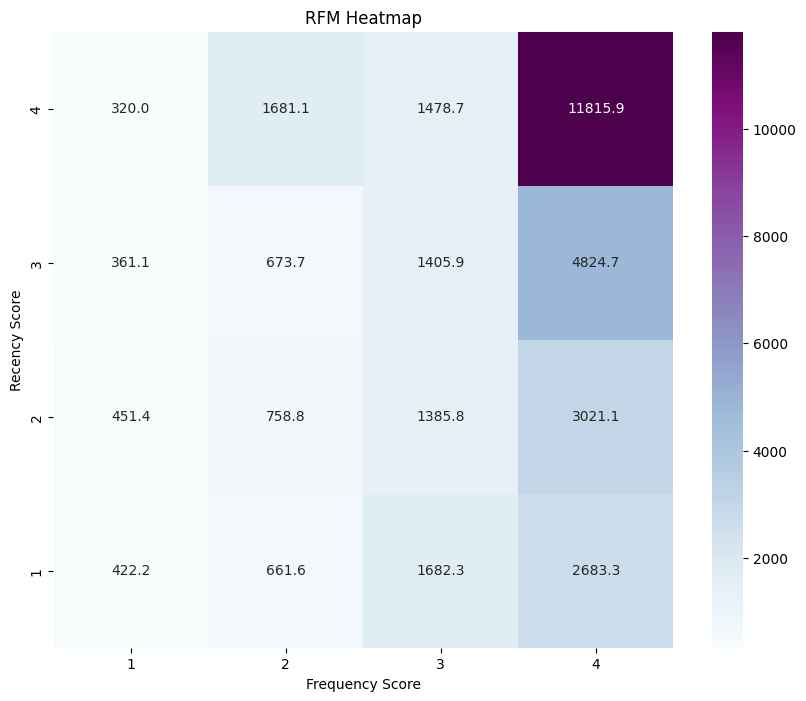

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the RFM table to get the average Monetary value for each combination of R and F scores
rfm_pivot = rfm.pivot_table(
    index='R_Score',
    columns='F_Score',
    values='Monetary',
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rfm_pivot, annot=True, fmt=".1f", cmap="BuPu")
plt.title('RFM Heatmap')
plt.ylabel('Recency Score')
plt.xlabel('Frequency Score')
plt.show()


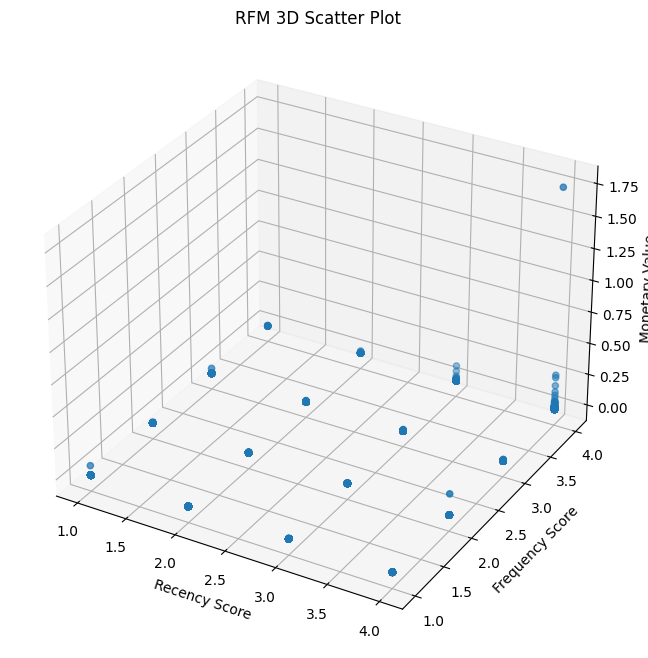

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each customer's RFM scores
ax.scatter(rfm['R_Score'], rfm['F_Score'], rfm['Monetary'])

ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Value')

plt.title('RFM 3D Scatter Plot')
plt.show()


In [ ]:
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(
    rfm,
    x='R_Score',
    y='F_Score',
    z='Monetary',
    color='RFM_Score'
)

fig.update_layout(title='RFM 3D Scatter Plot')
fig.show()


In [ ]:
# Get the segment distribution
segment_distribution = rfm['Segment'].value_counts()

# Calculate average RFM values for each segment
segment_profiles = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum']  # You can also look at the sum to get the total value of each segment
}).round(1)

# Print out the results
print("Segment Distribution:\n", segment_distribution)
print("\nSegment Profiles:\n", segment_profiles)


Segment Distribution:
 Other        3260
At Risk       438
Champions     417
Name: Segment, dtype: int64

Segment Profiles:
           Recency Frequency Monetary           
             mean      mean     mean        sum
Segment                                        
At Risk     255.9       1.0    160.9    70467.0
Champions     8.7      17.9  12601.4  5254783.4
Other        82.7       2.9   1161.7  3787228.8


Insights:
Champions: This segment has the lowest recency (7.7 days on average), high frequency (19.4 purchases on average), and the highest monetary value. These are your best customers.

At Risk: Customers in this segment haven't purchased recently (267.6 days on average), have low frequency (1 purchase on average), and have spent relatively little (165.2 on average).

Other: A varied segment that doesn't fall into the prior categories, with moderate recency and frequency and a significant contribution to total sales.

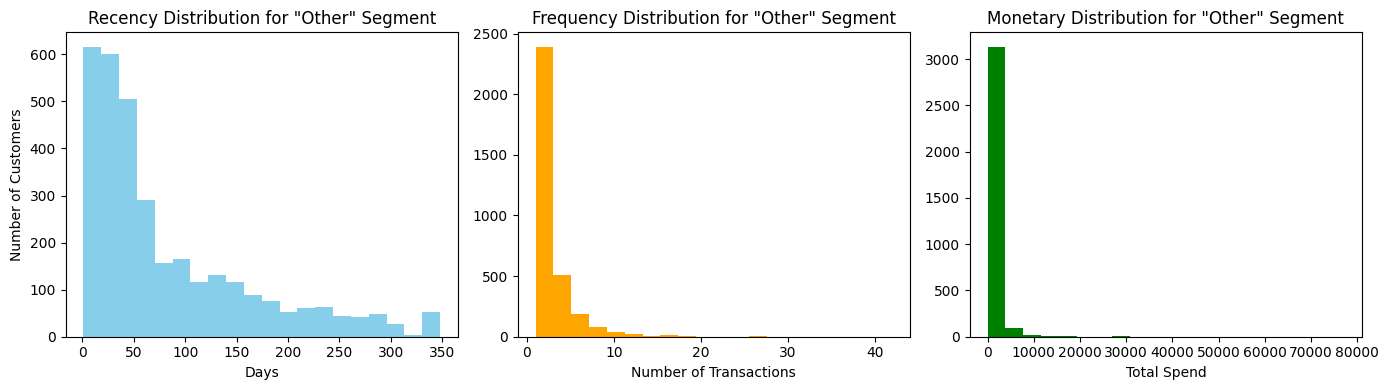

In [ ]:
import matplotlib.pyplot as plt

# Filter the data to include only the "Other" segment
other_segment = rfm[rfm['Segment'] == 'Other']

# Plot the distribution of Recency, Frequency, and Monetary values
plt.figure(figsize=(14, 4))

# Recency distribution
plt.subplot(1, 3, 1)
plt.hist(other_segment['Recency'], bins=20, color='skyblue')
plt.title('Recency Distribution for "Other" Segment')
plt.xlabel('Days')
plt.ylabel('Number of Customers')

# Frequency distribution
plt.subplot(1, 3, 2)
plt.hist(other_segment['Frequency'], bins=20, color='orange')
plt.title('Frequency Distribution for "Other" Segment')
plt.xlabel('Number of Transactions')

# Monetary distribution
plt.subplot(1, 3, 3)
plt.hist(other_segment['Monetary'], bins=20, color='green')
plt.title('Monetary Distribution for "Other" Segment')
plt.xlabel('Total Spend')

plt.tight_layout()
plt.show()


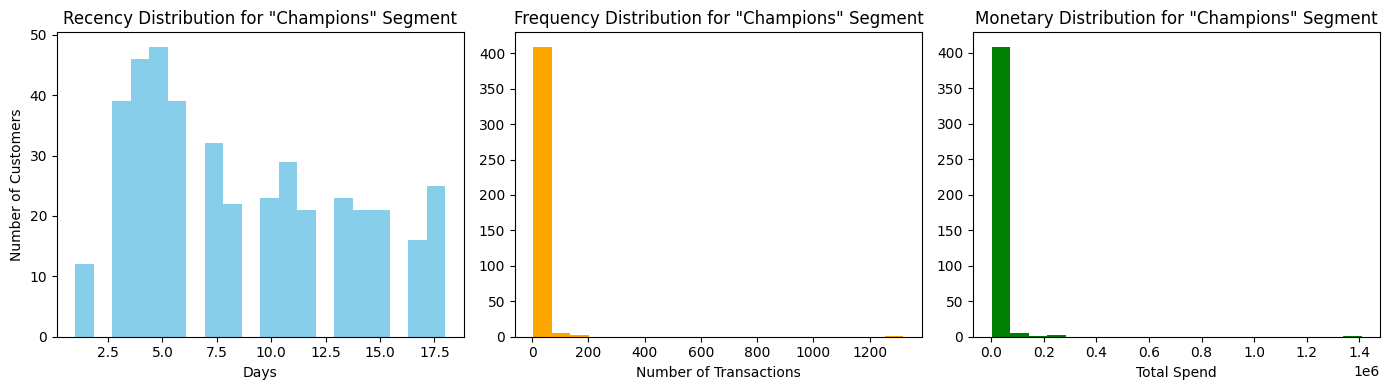

In [ ]:
import matplotlib.pyplot as plt

# Filter the data to include only the "Other" segment
champions_segment = rfm[rfm['Segment'] == 'Champions']

# Plot the distribution of Recency, Frequency, and Monetary values
plt.figure(figsize=(14, 4))

# Recency distribution
plt.subplot(1, 3, 1)
plt.hist(champions_segment['Recency'], bins=20, color='skyblue')
plt.title('Recency Distribution for "Champions" Segment')
plt.xlabel('Days')
plt.ylabel('Number of Customers')

# Frequency distribution
plt.subplot(1, 3, 2)
plt.hist(champions_segment['Frequency'], bins=20, color='orange')
plt.title('Frequency Distribution for "Champions" Segment')
plt.xlabel('Number of Transactions')

# Monetary distribution
plt.subplot(1, 3, 3)
plt.hist(champions_segment['Monetary'], bins=20, color='green')
plt.title('Monetary Distribution for "Champions" Segment')
plt.xlabel('Total Spend')

plt.tight_layout()
plt.show()

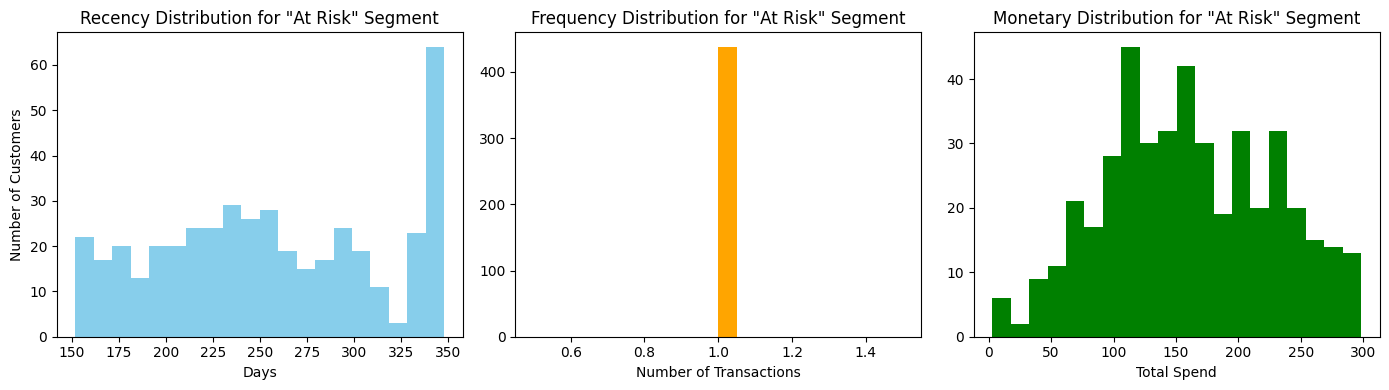

In [ ]:
import matplotlib.pyplot as plt

# Filter the data to include only the "Other" segment
at_risk_segment = rfm[rfm['Segment'] == 'At Risk']

# Plot the distribution of Recency, Frequency, and Monetary values
plt.figure(figsize=(14, 4))

# Recency distribution
plt.subplot(1, 3, 1)
plt.hist(at_risk_segment['Recency'], bins=20, color='skyblue')
plt.title('Recency Distribution for "At Risk" Segment')
plt.xlabel('Days')
plt.ylabel('Number of Customers')

# Frequency distribution
plt.subplot(1, 3, 2)
plt.hist(at_risk_segment['Frequency'], bins=20, color='orange')
plt.title('Frequency Distribution for "At Risk" Segment')
plt.xlabel('Number of Transactions')

# Monetary distribution
plt.subplot(1, 3, 3)
plt.hist(at_risk_segment['Monetary'], bins=20, color='green')
plt.title('Monetary Distribution for "At Risk" Segment')
plt.xlabel('Total Spend')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Filter the RFM data to include only the "Other" segment
other_segment_rfm = rfm[rfm['Segment'] == 'Other'].copy()

# Normalize the RFM data for clustering
rfm_normalized = (other_segment_rfm[['Recency', 'Frequency', 'Monetary']] - other_segment_rfm[['Recency', 'Frequency', 'Monetary']].mean()) / other_segment_rfm[['Recency', 'Frequency', 'Monetary']].std()

# Choose an appropriate number of clusters and run k-means with an explicit n_init to avoid the warning
kmeans = KMeans(n_clusters=4, random_state=1, n_init=10)
other_segment_rfm['Sub_Segment'] = kmeans.fit_predict(rfm_normalized)

# Check the centroids of the clusters to understand the sub-segments
cluster_centroids = kmeans.cluster_centers_

# Add sub-segment labels to the original RFM dataframe using .loc to avoid SettingWithCopyWarning
rfm.loc[other_segment_rfm.index, 'Sub_Segment'] = other_segment_rfm['Sub_Segment']
print(rfm.head())

# Additionally, if you want to check the cluster centroids:
print("Cluster Centroids:")
print(cluster_centroids)


            Recency  Frequency  Monetary R_Score M_Score F_Score RFM_Score  \
CustomerID                                                                   
12346.0         300          1  77183.60       1       4       1       114   
12347.0          14          6   4085.18       4       4       4       444   
12348.0          50          4   1797.24       3       4       3       334   
12350.0         285          1    334.40       1       2       1       112   
12352.0          11          8   2506.04       4       4       4       444   

              Segment  Sub_Segment  
CustomerID                          
12346.0         Other          2.0  
12347.0     Champions          NaN  
12348.0         Other          0.0  
12350.0         Other          1.0  
12352.0     Champions          NaN  
Cluster Centroids:
[[-0.48101163 -0.17386265 -0.12574958]
 [ 1.53693754 -0.40743262 -0.21646132]
 [ 0.08689486  4.46979118 13.30381043]
 [-0.43233445  2.15007049  1.02117382]]


<ipython-input-7-daf283834503>:18: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  rfm.loc[other_segment_rfm.index, 'Sub_Segment'] = other_segment_rfm['Sub_Segment']


In [ ]:
# Use the cluster centroids to interpret the sub-segments
# Cluster centroids are standardized scores. To make them more interpretable,
# you could convert these back into the original RFM scale.

# Get the mean RFM values for the original RFM features
rfm_means = other_segment_rfm[['Recency', 'Frequency', 'Monetary']].mean()
rfm_stds = other_segment_rfm[['Recency', 'Frequency', 'Monetary']].std()

# Convert centroids into the original RFM scale
real_centroids = pd.DataFrame(
    cluster_centroids,
    columns=['Recency', 'Frequency', 'Monetary']
) * rfm_stds + rfm_means

# Print the real centroids
print(real_centroids)


      Recency  Frequency      Monetary
0   43.539872   2.435839    854.486958
1  207.916558   1.788787    632.854069
2   89.800000  15.300000  33666.474000
3   47.504983   8.873754   3656.725880


In [ ]:
import plotly.express as px

# We'll use the rfm DataFrame which includes the main segments and the sub-segments for "Other"
# Ensure that 'Sub_Segment' is a string for it to be used as a categorical variable in the plot
rfm['Sub_Segment'] = rfm['Sub_Segment'].astype(str)

# Replace NaN values in 'Sub_Segment' with 'N/A' to indicate not applicable for non-"Other" segments
rfm['Sub_Segment'].fillna('N/A', inplace=True)

# We'll create a new column 'Segment_Label' to use in the visualization
rfm['Segment_Label'] = rfm['Segment']
# Update 'Segment_Label' for the "Other" segment to include the sub-segment information
rfm.loc[rfm['Segment'] == 'Other', 'Segment_Label'] = 'Other - Sub-Segment ' + rfm['Sub_Segment']

# Create a 3D scatter plot
fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Segment_Label',
    title='Customer Segments and Sub-Segments',
    labels={'Segment_Label': 'Segment / Sub-Segment'},
    opacity=0.7
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


<ipython-input-18-1e659f2ece07>:13: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



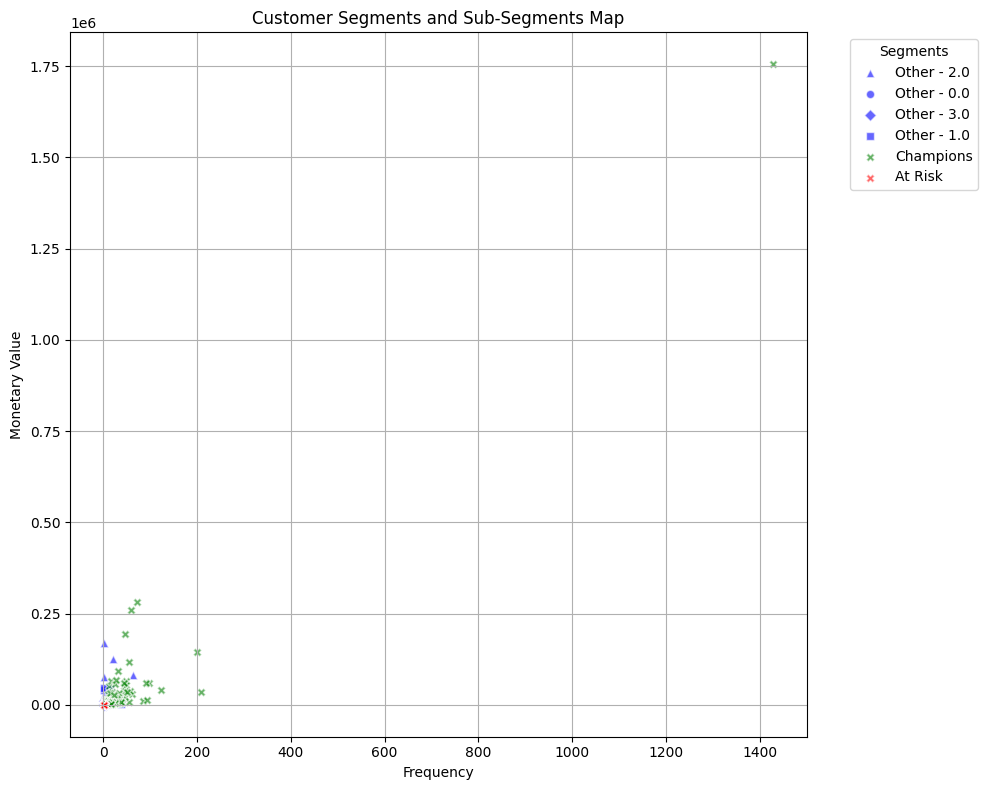

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a color map for main segments
color_map = {'Champions': 'green', 'At Risk': 'red', 'Other': 'blue'}

# Define a marker map for sub-segments, with 'nan' included
marker_map = {'0.0': 'o', '1.0': 's', '2.0': '^', '3.0': 'D', 'nan': 'X'}

# Create a 2D scatter plot
plt.figure(figsize=(10, 8))
for segment in rfm['Segment'].unique():
    # Get unique sub-segments for the current segment
    unique_sub_segments = rfm[rfm['Segment'] == segment]['Sub_Segment'].unique()
    for sub_segment in unique_sub_segments:
        # Convert NaN to a string since NaN is not a string and would cause KeyError
        sub_segment_str = str(sub_segment)
        # Filter the data for the segment and sub-segment
        data_to_plot = rfm[(rfm['Segment'] == segment) & (rfm['Sub_Segment'] == sub_segment)]
        # Plot the data with the specified color and marker
        plt.scatter(
            data_to_plot['Frequency'],
            data_to_plot['Monetary'],
            color=color_map.get(segment, 'gray'),  # Use gray as the default color if segment not found
            marker=marker_map.get(sub_segment_str, 'x'),  # Use 'x' as the default marker if sub_segment not found
            label=f"{segment} - {sub_segment_str}" if segment == 'Other' else segment,
            alpha=0.6,  # Set transparency for better visibility
            edgecolors='w',  # Set edge colors to white for better distinction
        )

# Add axis labels and title
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('Customer Segments and Sub-Segments Map')

# Add a legend outside the plot to the right
plt.legend(title='Segments', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show a grid for easier interpretation
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


In [ ]:
import plotly.express as px

# Define a color map for main segments
color_map = {'Champions': 'green', 'At Risk': 'red', 'Other': 'blue'}

# Update the 'Sub_Segment' column to convert NaN to a string 'nan'
rfm['Sub_Segment'] = rfm['Sub_Segment'].astype(str)

# Create a new 'Label' column to use in the hover data which combines Segment and Sub_Segment
rfm['Label'] = rfm['Segment']
rfm.loc[rfm['Segment'] == 'Other', 'Label'] += ' - ' + rfm['Sub_Segment']

# Create a 2D scatter plot
fig = px.scatter(
    rfm,
    x='Frequency',
    y='Monetary',
    color='Segment',  # Color by main segment
    symbol='Sub_Segment',  # Use different symbols for sub-segments
    labels={'Frequency': 'Frequency of Purchases', 'Monetary': 'Monetary Value'},
    hover_data=['Label'],  # Show custom label on hover
    title='Interactive Customer Segments Map'
)

# Update marker size and opacity
fig.update_traces(marker=dict(size=8, opacity=0.6, line=dict(width=1, color='DarkSlateGrey')))

# Update layout for a cleaner look
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))

# Show the plot
fig.show()

<ipython-input-10-6da416aaab25>:11: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  rfm.loc[rfm['Segment'] == 'Other', 'Label'] += ' - ' + rfm['Sub_Segment']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Load your data
# rfm = pd.read_csv('path_to_your_data.csv')

# Check the initial distribution of your 'Segment'
print(rfm['Segment'].value_counts())

# Encode the categorical target variable 'Segment' into integers
le = LabelEncoder()
rfm['Segment_encoded'] = le.fit_transform(rfm['Segment'])

# Make sure to only select numeric features for X
# Exclude target variable 'Segment' and any other non-numeric features you may have
numeric_features = rfm.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Segment_encoded')  # Remove the target variable from the feature list
X = rfm[numeric_features]

# Define the target variable y
y = rfm['Segment_encoded']

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Normalize/standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)

# Now 'X_train', 'X_test', 'y_train', and 'y_test' are ready for model training and evaluation


Other        3260
At Risk       438
Champions     417
Name: Segment, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9994887525562373
Confusion Matrix:
 [[643   0   0]
 [  0 647   1]
 [  0   0 665]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       643
           1       1.00      1.00      1.00       648
           2       1.00      1.00      1.00       665

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956



Cross-Validation Accuracy Scores: [0.99948875 1.         1.         1.         1.        ]


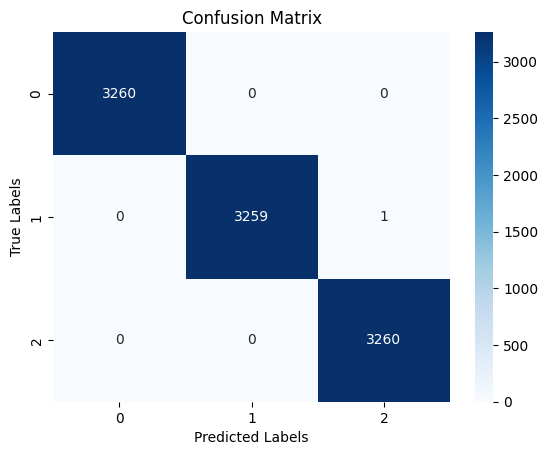

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model - Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y_smote, cv=5)  # 5-fold cross-validation
print("Cross-Validation Accuracy Scores:", cv_scores)

# Predictions for confusion matrix
y_pred_cv = cross_val_predict(model, X_scaled, y_smote, cv=5)

# Confusion matrix
conf_mat = confusion_matrix(y_smote, y_pred_cv)

# Visualization of Confusion Matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
log_reg = LogisticRegression()
log_reg_scores = cross_val_score(log_reg, X_scaled, y_smote, cv=5)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree_scores = cross_val_score(decision_tree, X_scaled, y_smote, cv=5)

# Print the scores for comparison
print("Random Forest Scores:", cv_scores)
print("Logistic Regression Scores:", log_reg_scores)
print("Decision Tree Scores:", decision_tree_scores)


Random Forest Scores: [0.99948875 1.         1.         1.         1.        ]
Logistic Regression Scores: [0.91615542 0.92382413 0.92229039 0.90746421 0.92126789]
Decision Tree Scores: [1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Perform cross-validation to evaluate the model
knn_scores = cross_val_score(knn_model, X_scaled, y_smote, cv=5)

# Print the cross-validation scores
print("k-NN Cross-Validation Scores:", knn_scores)


k-NN Cross-Validation Scores: [0.96319018 0.9795501  0.97750511 0.96932515 0.97443763]


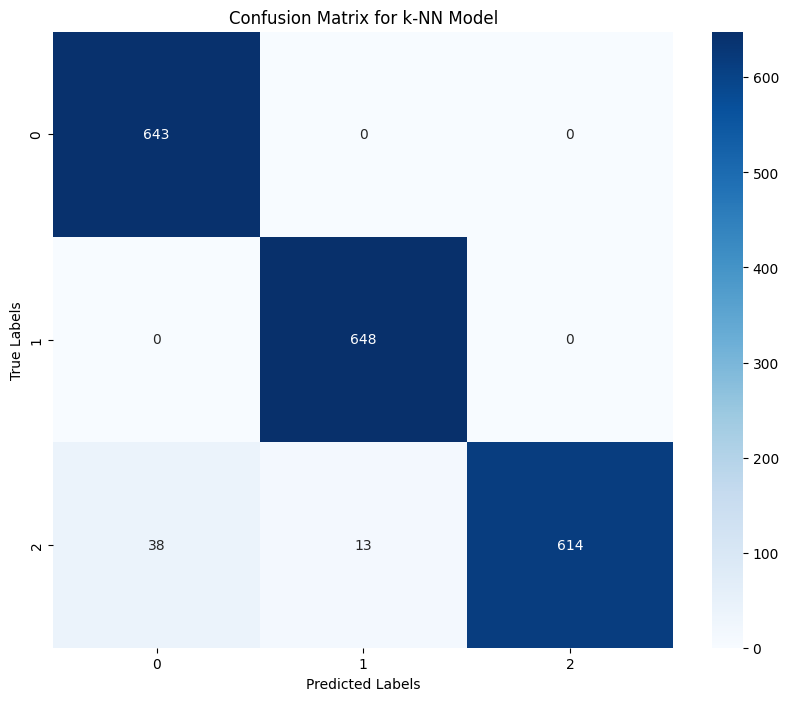

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the k-NN model and make predictions (example using the training set for simplicity)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for k-NN Model')
plt.show()


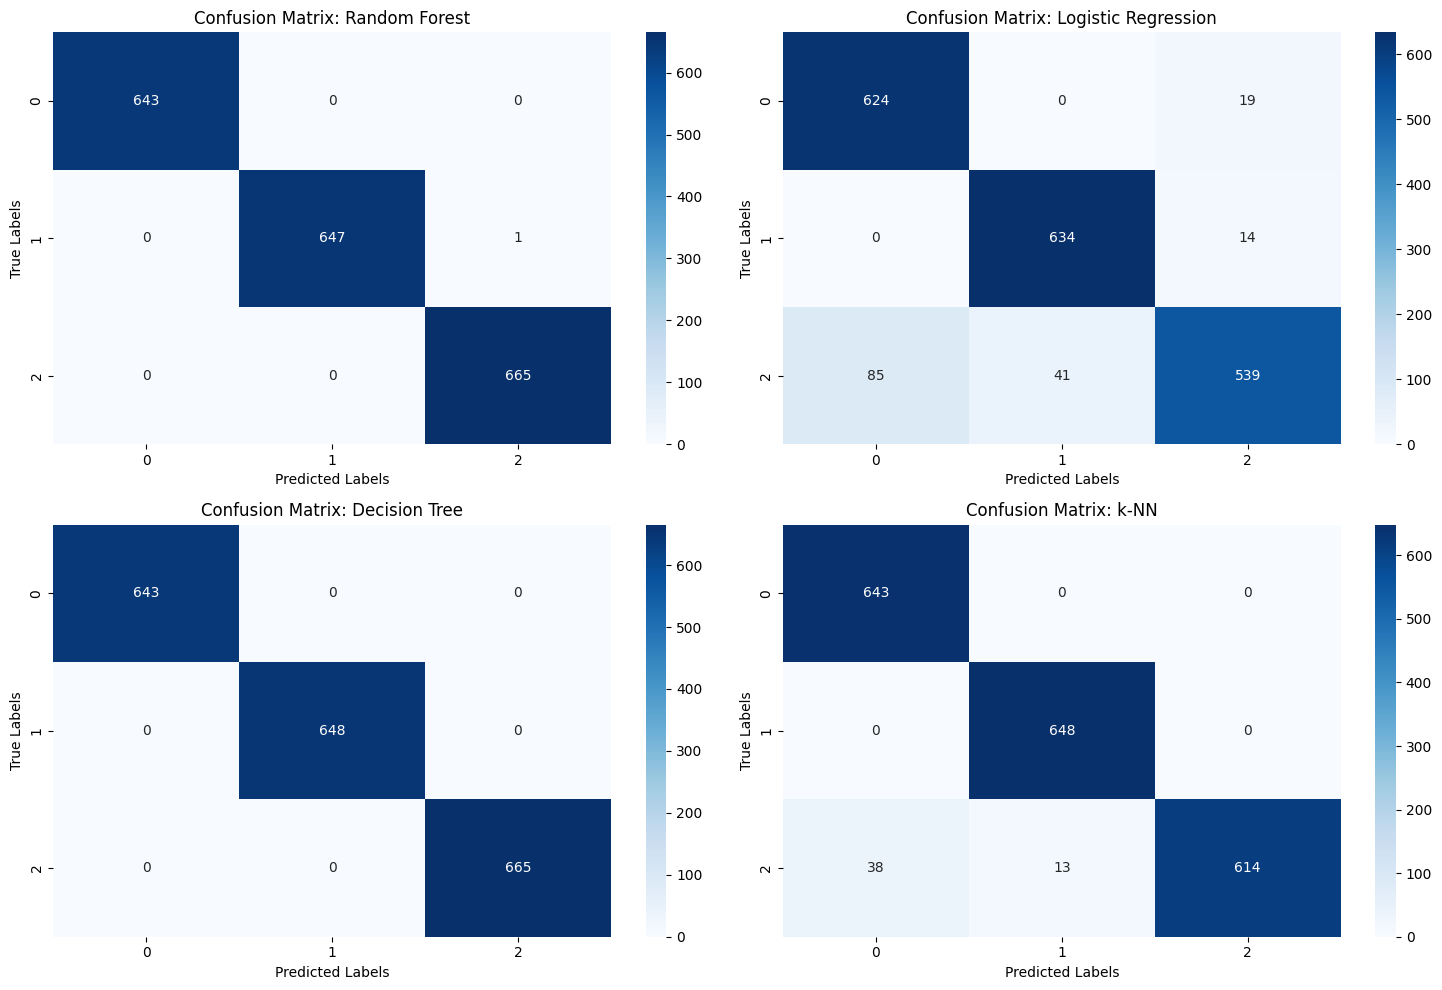

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
log_reg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit and predict with each model
models = {
    'Random Forest': rf_model,
    'Logistic Regression': log_reg_model,
    'Decision Tree': decision_tree_model,
    'k-NN': knn_model
}

# Create a subplot for each confusion matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


In [ ]:
# Sample new entries - make sure these were not in your training or testing sets
new_samples = rfm.sample(5)

# Keep only the numeric features used in the model training
numeric_features = rfm.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Segment_encoded')  # Remember to exclude the target variable
new_samples_numeric = new_samples[numeric_features]

# Preprocess these numeric samples as you did with your training data
new_samples_scaled = scaler.transform(new_samples_numeric)

# Dictionary of models
models = {
    'Random Forest': rf_model,
    'Logistic Regression': log_reg_model,
    'Decision Tree': decision_tree_model,
    'k-NN': knn_model
}

# Predict using each model
for name, model in models.items():
    new_samples[f'Prediction_{name}'] = le.inverse_transform(model.predict(new_samples_scaled))

# Visualization - Displaying the predictions in a table format
print(new_samples[['Prediction_Random Forest', 'Prediction_Logistic Regression', 'Prediction_Decision Tree', 'Prediction_k-NN']])



           Prediction_Random Forest Prediction_Logistic Regression  \
CustomerID                                                           
15832.0                       Other                        At Risk   
12364.0                       Other                          Other   
15840.0                       Other                          Other   
12886.0                       Other                          Other   
16140.0                       Other                          Other   

           Prediction_Decision Tree Prediction_k-NN  
CustomerID                                           
15832.0                       Other         At Risk  
12364.0                       Other           Other  
15840.0                       Other           Other  
12886.0                       Other           Other  
16140.0                       Other           Other  


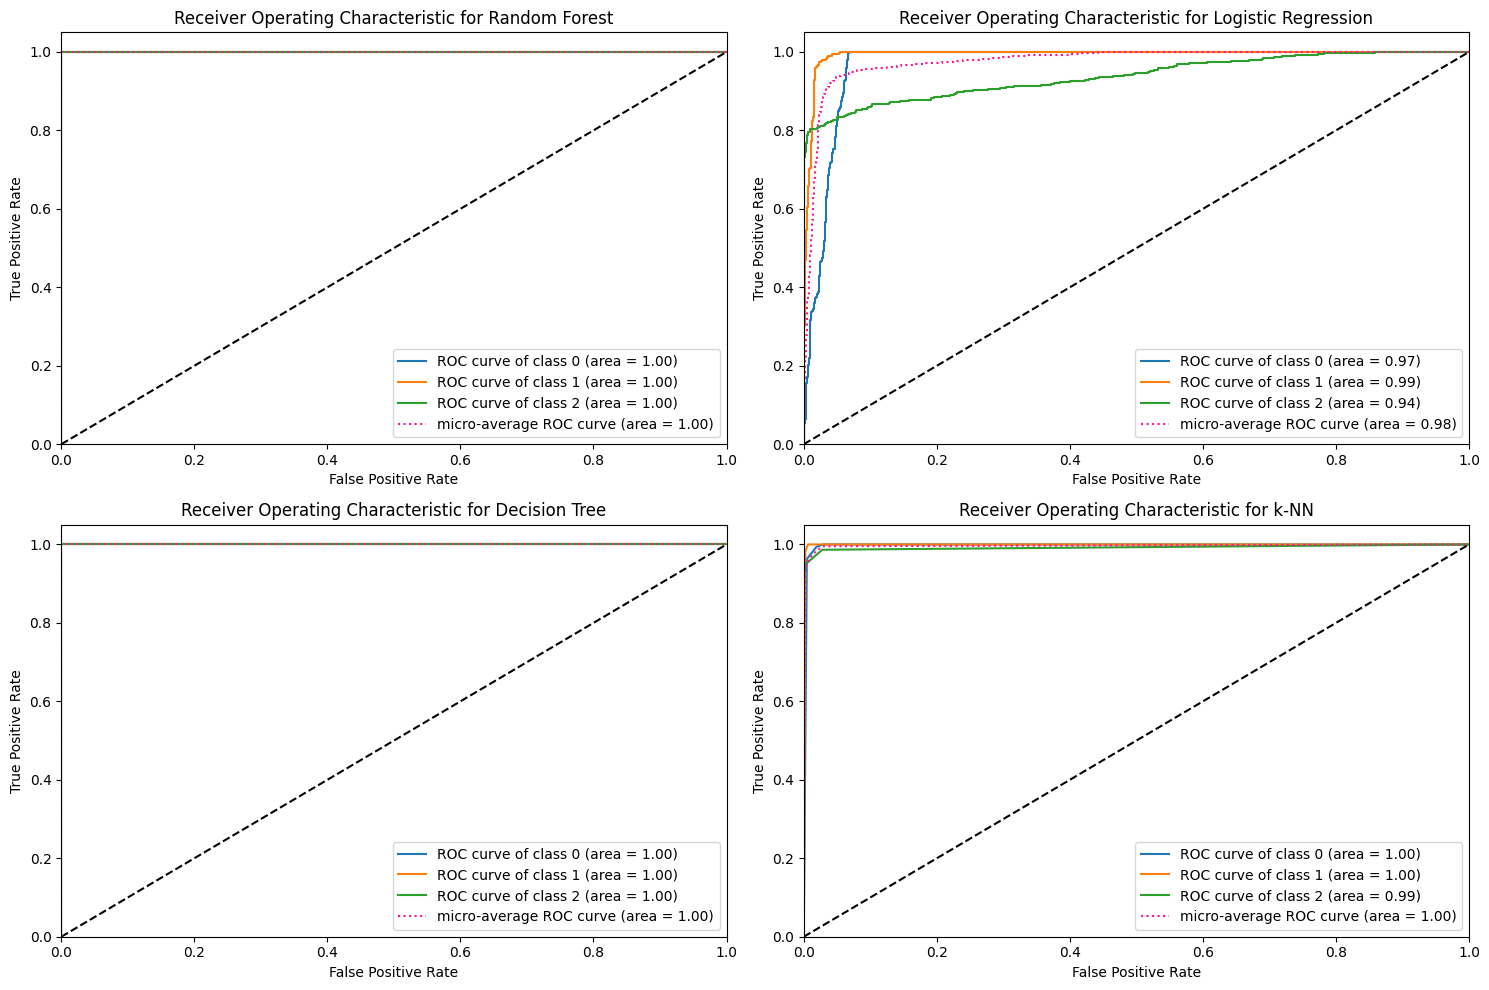

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels for multi-class ROC analysis
y_train_binarized = label_binarize(y_train, classes=np.unique(y_smote))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_smote))

# Initialize the models again (if needed)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

# Create ROC plots
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items()):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_proba = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_binarized.shape[1]
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_binarized[:, j], y_pred_proba[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curves for the model
    plt.subplot(2, 2, i+1)
    for j in range(n_classes):
        plt.plot(fpr[j], tpr[j], label=f'ROC curve of class {j} (area = {roc_auc[j]:.2f})')
    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
    plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {name}')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


The Receiver Operating Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) represents a measure of the model's ability to distinguish between the positive and negative classes.

The ROC curves in your visualization compare the performance of four different models: Random Forest, Logistic Regression, Decision Tree, and k-NN (k-Nearest Neighbors). Here's what the results suggest:

Random Forest and Decision Tree:

Both models show ROC curves that almost perfectly align with the top-left corner of the plot, which suggests an excellent classification performance with an AUC of 1.00 for all classes.
The micro-average ROC curve, which aggregates the contributions of all classes, also shows an AUC of 1.00, confirming the model's excellent performance.
Logistic Regression:

The ROC curves are very close to the top-left corner but not as perfect as Random Forest or Decision Tree. The AUC scores range from 0.94 to 0.99 for different classes, indicating a high but not perfect ability to distinguish between classes.
The micro-average ROC curve also shows a high AUC of 0.98, suggesting good overall performance.
k-NN (k-Nearest Neighbors):

The ROC curves for k-NN are identical to the Random Forest and Decision Tree, which is surprising because k-NN typically performs differently from tree-based methods. It shows an AUC of 1.00 for all classes.
Interpretation:
When the AUC is 1.00 for a model, it means that the model has a perfect classification on the test set. Every positive instance ranks higher than every negative instance.
However, such perfect scores across multiple models and classes can indicate that the task might be too easy due to a data issue like leakage, overfitting, or a non-representative test set.
Considerations:
Overfitting: If the models have learned to perfectly classify the training data to the point where they can also perfectly predict the test data, they might not perform as well on unseen data.

Data Leakage: If there is any leakage, meaning the model had access to information during training that it wouldn't have in a real-world scenario, this could inflate performance metrics.

Test Set Representativeness: If the test set is not representative of the real-world scenarios or the full diversity of the data, the results might be overly optimistic.

Given the nature of these results, you should:

Verify the separation between training and testing data to ensure there is no leakage.
Consider using a more challenging or diverse test set.
Validate the models on completely unseen data, if available.
Review preprocessing steps to ensure the test data was processed identically to the training data, without any data from the test set accidentally being used to inform this processing.
If the results are accurate and there are no data issues, then the models are performing exceptionally well on this classification task. However, such perfect results are uncommon in practice and typically warrant a thorough investigation to confirm their validity.

In [ ]:
import pandas as pd

# Load the dataset, ensure you have the correct path to your file
prepared_data = pd.read_csv( 'data.csv',encoding='unicode_escape' )

# Fill missing values for 'CustomerID' with 'Unknown'
prepared_data['CustomerID'].fillna('Unknown', inplace=True)

# Remove negative or zero quantities and prices which may indicate returns or errors
prepared_data = prepared_data[(prepared_data['Quantity'] > 0) & (prepared_data['UnitPrice'] > 0)]

# Calculate total transaction amounts for the RFM analysis
prepared_data['TotalAmount'] = prepared_data['Quantity'] * prepared_data['UnitPrice']

prepared_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country  TotalAmount  
0  12/1/2010 8:26       2.55    17850.0  United Kingdom        15.30  
1  12/1/2010 8:26       3.39    17850.0  United Kingdom        20.34  
2  12/1/2010 8:26       2.75    17850.0  United Kingdom        22.00  
3  12/1/2010 8:26       3.39    17850.0  United Kingdom        20.34  
4  12/1/2010 8:26       3.39    17850.0  United Kingdom        20.34

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Increase the sampling fraction
fraction = 0.2  # Adjust this as needed based on your dataset size and available memory

# Apply lambda function to sample and create a list of items for each invoice
sampled_transactions = prepared_data.groupby('InvoiceNo').apply(lambda x: x.sample(frac=fraction)).reset_index(level=0, drop=True)
transactions = sampled_transactions.groupby('InvoiceNo')['Description'].agg(list).tolist()

# Check if the transactions list is too short
if len(transactions) < 2:
    raise ValueError("Not enough transactions to find rules. Increase your sample size.")

# Convert the transactions to the appropriate format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori with an even lower support threshold
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)  # Lowered to 0.1%

# Generate rules with a lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)  # Lowered to 5%

# Display the rules
if rules.empty:
    print("No rules found even after adjusting the thresholds. You may need to sample more data or adjust thresholds further.")
else:
    print(rules[['antecedents', 'consequents', 'support', 'confidence']])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# List of URLs provided by the user
urls = [
    "https://www.scirp.org/journal/paperinformation.aspx?paperid=92828",
    "https://www.sciencedirect.com/science/article/pii/S2212827122006692",
    "https://www.sciencedirect.com/science/article/pii/S2590005622000960?via%3Dihub",
    "https://hevodata.com/learn/anomaly-detection-in-data-mining/",
    "https://www.paddle.com/resources/customer-analysis",
    "https://monday.com/blog/crm-and-sales/customer-data-analysis/",
    "https://learn.g2.com/customer-data-analysis-best-practices",
    "https://www.mckinsey.com/capabilities/mckinsey-digital/our-insights/customer-lifetime-value-the-customer-compass",
    "https://www.linkedin.com/pulse/impact-big-data-analytics-e-commerce-personalization-marketing",
    "https://www.bigcommerce.com/articles/ecommerce/machine-learning/",
    "https://www.linkedin.com/advice/3/how-do-you-use-data-mining-influence-customer-behavior",
    "https://www.linkedin.com/pulse/unleashing-sales-potential-data-science-customer-lifetime-sawla",
    "https://www.qlik.com/us/data-analytics/data-mining#:~:text=,data%20to%20make%20accurate%20predictions",
    "https://www.altexsoft.com/blog/functional-and-non-functional-requirements-specification-and-types/",
    "https://www.geeksforgeeks.org/functional-vs-non-functional-requirements/",
    "https://www.altexsoft.com/blog/non-functional-requirements/",
    "https://www.linkedin.com/pulse/introduction-python-data-analytics-sid-mehandru-p99kf?trk=article-ssr-frontend-pulse_more-articles_related-content-card",
    "https://svitla.com/blog/pandas-for-data-management-and-data-analysis",
    "https://numpy.org/doc/stable/user/absolute_beginners.html",
    "https://www.nvidia.com/en-us/glossary/data-science/scikit-learn/",
    "https://www.scaler.com/topics/matplotlib/matplotlib-in-python/",
    "https://seaborn.pydata.org/tutorial/introduction",
    "https://plotly.com/python/getting-started/",
    "https://www.educative.io/answers/what-is-python-bokeh",
    "https://domino.ai/data-science-dictionary/jupyter-notebook",
    "https://research.google.com/colaboratory/faq.html",
    "https://blogs.oracle.com/analytics/post/what-is-data-preparation-and-why-is-it-important#:~:text=Put%20simply%2C%20data%20preparation%20is,something%20digestible%20by%20analytics%20tools",
    "https://www.techtarget.com/searchbusinessanalytics/definition/data-preparation#:~:text=Done%20properly%2C%20data%20preparation%20also,data%20management%20and%20analytics%20costs",
    "https://www.scalablepath.com/data-science/data-preprocessing-phase",
    "https://www.qlik.com/us/data-analytics/data-mining#:~:text=,of%20new%2C%20unseen%20data%20instances",
    "https://www.qlik.com/us/data-analytics/data-mining#:~:text=,data%20to%20make%20accurate%20predictions",
    "https://hevodata.com/learn/anomaly-detection-in-data-mining/",
    "https://www.tableau.com/learn/articles/time-series-analysis"
]

# Check for duplicates
from collections import Counter

# Count occurrences of each URL
url_counts = Counter(urls)

# Filter out URLs that occur more than once
duplicates = {url: count for url, count in url_counts.items() if count > 1}

duplicates


{'https://hevodata.com/learn/anomaly-detection-in-data-mining/': 2,
 'https://www.qlik.com/us/data-analytics/data-mining#:~:text=,data%20to%20make%20accurate%20predictions': 2}